# Prosper Loan Data Exploration
## by Mehmet Yildirim

## Preliminary Wrangling

This document explores a dataset of 113,937 loans. There are 81 attributes on each loan, but it is required to focus only 14 of them in exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.head(10))
print(loan.info())

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN 

In [4]:
# descriptive statistics for numeric variables
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

There are 113937 loans in the dataset with 81 features. Most features (61) in this dataset are numeric in nature. 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting 

- The loan’s outcome status
- Borrower’s APR
- Credit Score

in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that:

- Category
- Borrower State
- Employment Status
- Employment Status Duration
- Borrower's Home Ownership
- Debt to Income Ratio
- Income Range
- Income Verifiableness
- Stated Monthly Income
- Original Loan Amount
- Monthly Loan Payment

will have effect on loan's outcome status, borrower's APR and Credit Scores.

## Univariate Exploration

**First of all I will explore the main features of interest in my dataset.**

### Loan Status
There are 12 different status for the loan:

- Completed
- FinalPaymentInProgress
- Current
- Past Due (1-15 days)
- Past Due (16-30 days)
- Past Due (31-60 days)
- Past Due (61-90 days)
- Past Due (91-120 days)
- Past Due (>120 days)
- Cancelled
- Defaulted
- Chargedoff

##### Cancelled 
Cancellation of debt occurs when a creditor relieves a debtor from a debt obligation.(1) 

##### Defaulted
Defaulting on a loan happens when repayments aren't made for a certain period of time. When a loan defaults, it is sent to a debt collection agency whose job is to contact the borrower and receive the unpaid funds.(2)

##### Chargedoff
A charge-off is a debt, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time.(3)

I've ordered the data such that the success of paying the debt of loan is at the top. I also rename all of the variables related to past due as "Past Due" to reduce the visualization complexity. I also renamed FinalPaymentInProgress as Current since the payment is not completed.

This way, the number of status are reduced to 6.

**Sources:**
1. https://www.investopedia.com/terms/c/cancellation-of-debt.asp
2. https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan
3. https://www.investopedia.com/terms/c/chargeoff.asp

In [5]:
loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

**As there are only 5 borrowers with loan canceled, I will remove status "Cancelled"**

In [6]:
loan.drop(loan[(loan.LoanStatus == "Cancelled")].index, inplace=True)

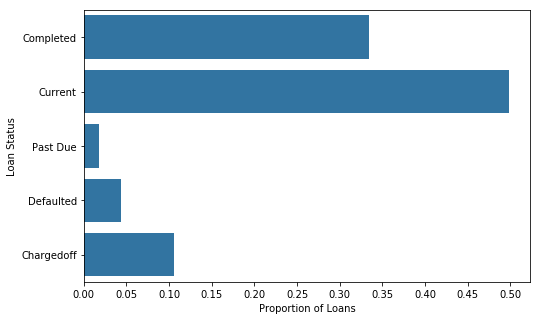

In [7]:
# Replace all Past Due (..days) values with Past Due to reduce visualization complexity using .replace 
loan['LoanStatus']=loan['LoanStatus'].replace(['Past Due (1-15 days)', 
                                               'Past Due (16-30 days)',
                                               'Past Due (31-60 days)',
                                               'Past Due (61-90 days)',
                                               'Past Due (91-120 days)',
                                               'Past Due (>120 days)'],'Past Due')
# FinalPaymentInProgress is not a completed loan status, we can count this as Current  
loan['LoanStatus']=loan['LoanStatus'].replace('FinalPaymentInProgress', 'Current')

''' I ordered the loan status in terms of my understanding of success of the Loan. This may be subjective, 
    however, I guess it is better than ordered visualization'''

level_order = ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loan['LoanStatus'] = loan['LoanStatus'].astype(ordered_cat)

# get proportion taken by most common group for derivation of tick marks
n_points = loan.shape[0]
cat_counts = loan['LoanStatus'].value_counts()
max_count = cat_counts.max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize = [8, 5])

# use blue color palette
default_color = sb.color_palette()[0];

# use bar plot
sb.countplot(data = loan, y = 'LoanStatus',color = default_color);

# add labels
plt.xlabel('Proportion of Loans');
plt.ylabel('Loan Status');
plt.xticks(tick_props * n_points, tick_names);

Nearly:
- half of the loan status is "Current", 
- 1/3 of it is "Completed", 
- %10 of it is "Chargedoff",
- %5  of it is "Defaulted"

### Borrower APR

An annual percentage rate (APR) is the annual rate charged for borrowing or earned through an investment. APR is expressed as a percentage that represents the actual yearly cost of funds over the term of a loan. This includes any fees or additional costs associated with the transaction but does not take compounding into account.

https://www.investopedia.com/terms/a/apr.asp

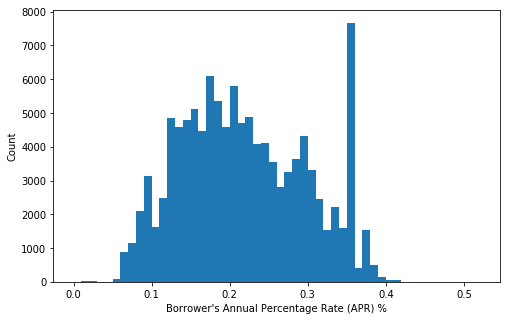

In [8]:
# specify plot size
plt.figure(figsize = [8, 5])

# specify bin size
binsize = 0.01;
bins = np.arange(0, loan['BorrowerAPR'].max()+binsize, binsize);

# use histogram plot as we are exploring numerical variable.
plt.hist(data=loan,x='BorrowerAPR',bins=bins);

# add label names
plt.xlabel("Borrower's Annual Percentage Rate (APR) %");
plt.ylabel('Count');

**There are some spikes at Borrower APR around 0.1 0.2, 0.3 and 0.35. The peak at 0.35 is very high.** 

### Lower Credit Score Range

The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

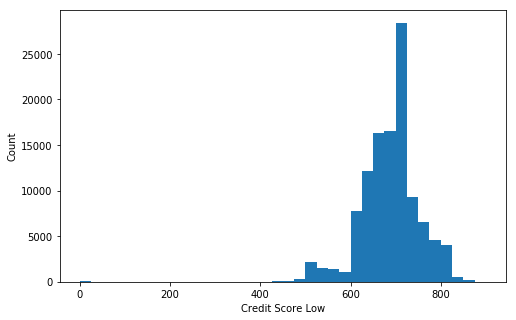

In [9]:
# specify plot size
plt.figure(figsize = [8, 5])

# specify bin size
binsize = 25;
bins = np.arange(0, loan['CreditScoreRangeLower'].max()+binsize, binsize);

# use histogram plot as we are exploring numerical variable.
plt.hist(data=loan,x='CreditScoreRangeLower',bins=bins);

# add label names
plt.xlabel("Credit Score Low");
plt.ylabel('Count');

**There are outliers around 0, I will not remove this because it may be related with other variables. However, I will draw new histplot with removing this outlier from the plot.**

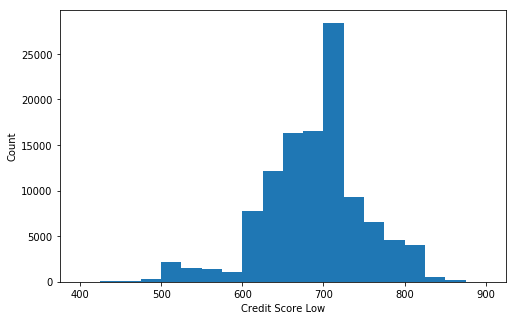

In [10]:
# create the plot
plt.figure(figsize = [8, 5])

# specify bin size
binsize = 25;
bins = np.arange(400, loan['CreditScoreRangeLower'].max()+binsize, binsize);

# use histogram plot as we are exploring numerical variable.
plt.hist(data=loan,x='CreditScoreRangeLower',bins=bins);

# add label names
plt.xlabel("Credit Score Low");
plt.ylabel('Count');

**Here, again there are spikes around 500, 600 and 700. We can say the plot is bimodal, one mode is around 500 other is around 700**

### Category

The category of the listing that the borrower selected when posting their listing: 
0. Not Available, 
1. Debt Consolidation, 
2. Home Improvement, 
3. Business, 
4. Personal Loan, 
5. Student Use, 
6. Auto, 
7. Other, 
8. Baby&Adoption, 
9. Boat, 
10. Cosmetic Procedure, 
11. Engagement Ring, 
12. Green Loans, 
13. Household Expenses, 
14. Large Purchases, 
15. Medical/Dental, 
16. Motorcycle, 
17. RV, 
18. Taxes, 
19. Vacation, 
20. Wedding Loans

This variable is numeric, but should be categorical because we will not applying mathematical operations on them. Therefore, I've replaced numbers with the Category names.

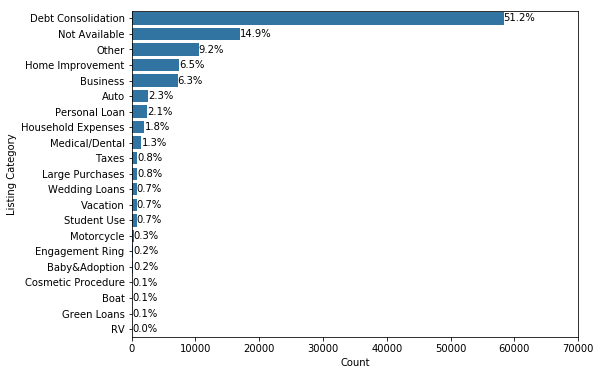

In [11]:
# Learned how to encode numerical variables to categorical variables from here: https://pbpython.com/categorical-encoding.html
# change numerical values with descriptive categorical variables.
nums_to_cat = {"ListingCategory (numeric)":{0:"Not Available", 1:"Debt Consolidation", 2:"Home Improvement", 3:"Business",
                                            4:"Personal Loan", 5:"Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
                                            9:"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
                                            13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
                                            16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}}
loan.replace(nums_to_cat, inplace=True)

loan.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

n_points = loan.shape[0]
cat_counts = loan.ListingCategory.value_counts()

# specify plot size
plt.figure(figsize = [8, 6])

# order data such that most common category at the top
type_counts=loan.ListingCategory.value_counts()
type_order=type_counts.index

# use blue color
default_color = sb.color_palette()[0];

# use bar chart it is a categorical variable. 
sb.countplot(data = loan, y = 'ListingCategory',color = default_color, order=type_order);

# add label names
plt.xlabel("Count");
plt.ylabel('Listing Category');
plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])

for i in range(cat_counts.shape[0]):
    
    # get the text property for the label to get the correct count
    count = cat_counts[i] 
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(count+1, i, pct_string, va = 'center')

**It is suprising to see that more than half of the loans are borrowed for dept consolidation. 
%14.9 of the loans are "not available". We don't know what the loan is borrowed for. And, %9.2 other? These two was uninformative. The 4th and 5th most common categories are home improvement and business, around %6.5 and %6.3 of the loans are borrowed for home improvement and business respectively.** 

Remove categories less than % 0.2

In [12]:
loan.drop(loan[(loan.ListingCategory == "RV")|(loan.ListingCategory == "Green Loans")|(loan.ListingCategory == "Cosmetic Procedure")|(loan.ListingCategory == "Boat")].index, inplace=True)

### Borrower State

The state of the borrowers are explored in this part.

In [13]:
state_count = loan.BorrowerState.value_counts()
state_count.head()

CA    14675
TX     6819
NY     6718
FL     6689
IL     5907
Name: BorrowerState, dtype: int64

**There are lots of states. It would be horrible to show them in pie chart or bar plot. Therefore I choose to show these counts on a US State Map using geopandas library.**

To do this we need data first. I searched a US State map in one of the formats that geopandas requires. 
Here there are nice maps: I download these maps to project folder and named as us_state:

https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html

The name of the data is very long, so I renamed as us_state.

In [14]:
# load in the dataset into a geopandas dataframe,
map_df = gpd.read_file("us_state.shp")
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0..."
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4..."
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43..."


**The column "STUSPS" is same as BorrowerState, shows states as two letter abbreviations.** 

In [15]:
# I used this stackoverflow source to convert value_counts to a dataframe: 
# https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
state_count = loan.BorrowerState.value_counts()
state_count_df = state_count.rename_axis('state').reset_index(name='counts')
state_count_df.head(5)

,state,counts
0,CA,14675
1,TX,6819
2,NY,6718
3,FL,6689
4,IL,5907


In [16]:
# To use value_counts in geopandas, I had to merge this state_count_df to a pandas dataframe.The source below was very helpful. 
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# Also I get help from this source:
# http://ramiro.org/notebook/geopandas-choropleth/
merged_df = map_df.merge(state_count_df, left_on='STUSPS', right_on='state')
merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,counts
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",WV,389
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",IL,5907
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",MD,2814
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",ID,599
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",VT,207


**Dropped Hawaii and Alaska because these states are distant -> making difficult to see the details in plot.**

In [17]:
# I've checked the below source to drop these states:
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
merged_df.drop(merged_df[(merged_df.STUSPS == "AK") | (merged_df.STUSPS == "HI")].index, inplace=True)

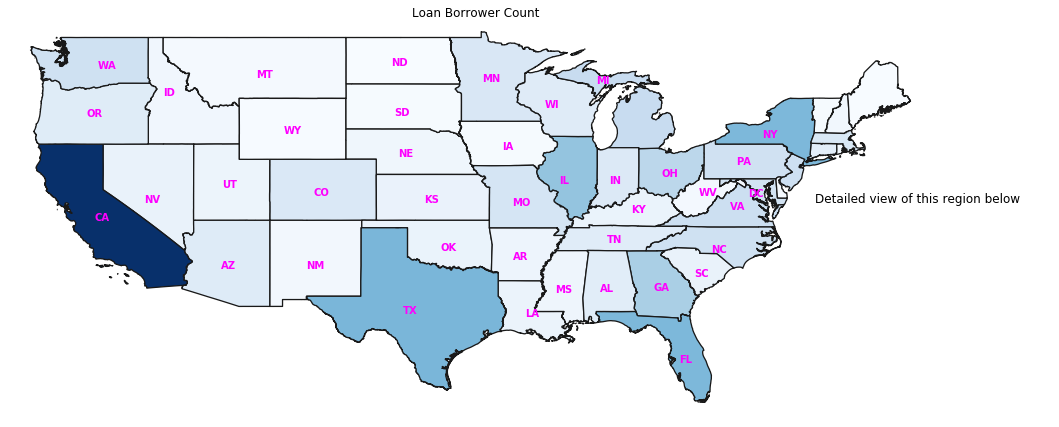

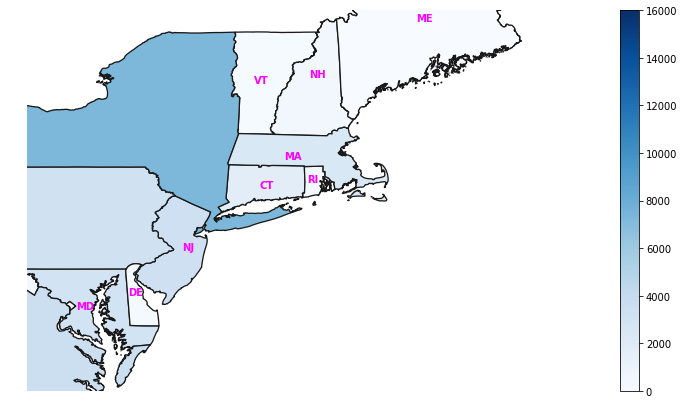

In [18]:
# Need further detailed view of new york region because around this region states are very small.
fig,ax1 = plt.subplots(1,figsize=(20, 7))
fig,ax2 = plt.subplots(1,figsize=(20, 7))

# To show states on the map, I need to get the representative point location in the map. Used this source
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons/38902492
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

# Plot both maps 
ax1 = merged_df.plot(column ='counts',alpha=1,linewidth=1.3,ax=ax1,edgecolor='1.1',cmap='Blues')
ax2 = merged_df.plot(column ='counts',alpha=1,linewidth=1.3,ax=ax2,edgecolor='1.1',cmap='Blues')

# Annotate state labels on map
for idx, row in merged_df.iterrows():
    if not row.STUSPS in (['ME','VT','NH','MA','RI','CT','NJ','DE','MD']): 
        ax1.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.6,row['coords'][1]-0.3),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
    else:
        ax2.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.15,row['coords'][1]),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')

# As some states such as Hawaii and Alaska were very distant, other states was shown very small, so I had to set axis limits to
# highlight other states.
ax1.set_xlim([-125, -66])
ax1.set_ylim([25, 50])

# these axis limits are for detailed region:
ax2.set_xlim([-78, -66])
ax2.set_ylim([37, 45.5])
ax1.axis("off")
ax2.axis("off")

# add a title
ax1.set_title("Loan Borrower Count");

# create an annotation for the data source
ax1.annotate("Detailed view of this region below",xy=(0.77, 0.55),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12)

# limits for colorbar:(counts)
vmin, vmax = 0, 16000

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

**Although it is difficult to get some details in small states such as Washington DC, this plot is showing a general view of the data. For example, 5 states with most of borrowers are California, New York, Florida, Texas and Ilinois. I could have got this from barplot. However, it is nice to see directly which state you want to pick, if you know geographic location of the state. Also, I added abbreviations of states in two letters. You can't get easily that coastal cities have the highest numbers of borrowers if you use a barplot.**

### Employment Status

The employment status of the borrower at the time they posted the listing.
- Employed, 
- Self-employed
- Full-time, 
- Part-time
- Not available, 
- Other, 
- Not employed
- Retired

Remove "Not available" since it is not informative.

In [19]:
loan.drop(loan[(loan.EmploymentStatus == "Not available")].index, inplace=True)
loan[(loan.EmploymentStatus == "Not available")]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


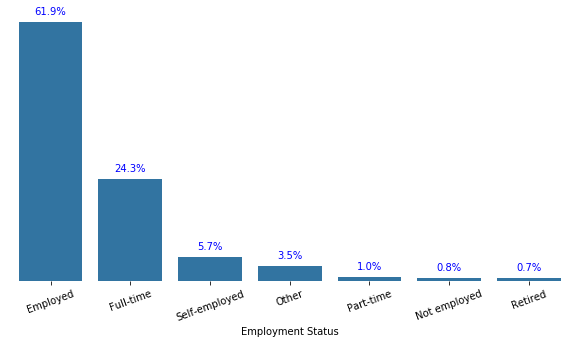

In [20]:
plt.figure(figsize = [10, 5]) 
default_color = sb.color_palette()[0];

# order values according to the count
type_counts=loan.EmploymentStatus.value_counts()
type_order=type_counts.index

# use bar chart as it is a categorical variable
ax=sb.countplot(data = loan, x = 'EmploymentStatus',color = default_color,order=type_order);

plt.xticks(rotation = 20)
plt.xlabel("Employment Status");

# remove y axis: get help from:
# https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)

# remove frames, get help from:
# https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add annotations
n_points = loan.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2000, pct_string, ha = 'center',color = 'b')

**Looking at bar chart the borrowers are mostly employed, however %1 of the borrowers are employed as part-time, %0.8 are not employed and %0.7 are retired.**

### Employment Status Duration

The length in months of the employment status at the time the listing was created.

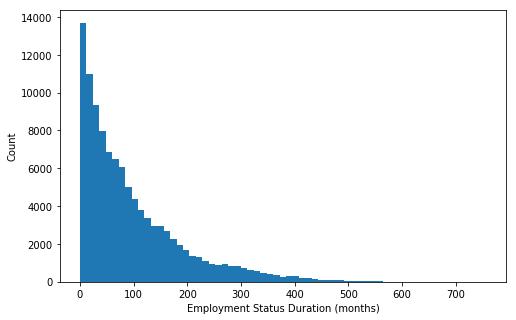

In [21]:
plt.figure(figsize = [8, 5])

# specify bin size of histogram
binsize = 12;
bins = np.arange(0, loan['EmploymentStatusDuration'].max()+binsize, binsize);

# use histagram as it is a numerical variable
plt.hist(data=loan,x='EmploymentStatusDuration',bins=bins);

plt.xlabel("Employment Status Duration (months)");
plt.ylabel('Count');

**There's a long tail in the distribution, so let's put it on a log scale instead**

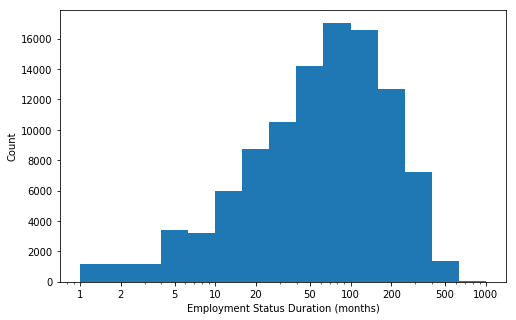

In [22]:
plt.figure(figsize=[8, 5])

# specify bin size of histogram
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(loan['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

# use histagram as it is a numerical variable
plt.hist(data = loan, x = 'EmploymentStatusDuration', bins = bins)

plt.xscale('log')

# ticks appropriate for log scale.
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])

plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count')
plt.show()

**It is suprising to see that recently employed people is most likely to be borrower. The plot is now slightly negatively skewed with unimodal distribution.**

### Home Owners

A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

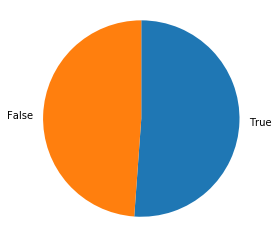

In [23]:
sorted_counts = loan['IsBorrowerHomeowner'].value_counts();

# use pie chart as it is categorical variable and there are only two values.
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

**About half of the borrowers are home owner which is more than I expected. This is mostly because the people with mortgage on their credit profile included.**

### Debt To Income Ratio

The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

**Since values more than %1000 are written as 10.01, this misinformation may lead to incorrect conclusions. I therefore removed these values.**

In [24]:
loan['DebtToIncomeRatio']=loan['DebtToIncomeRatio'].replace(10.01 ,np.nan)
# test if it is replaced:
loan[loan['DebtToIncomeRatio']==10.01].DebtToIncomeRatio

Series([], Name: DebtToIncomeRatio, dtype: float64)

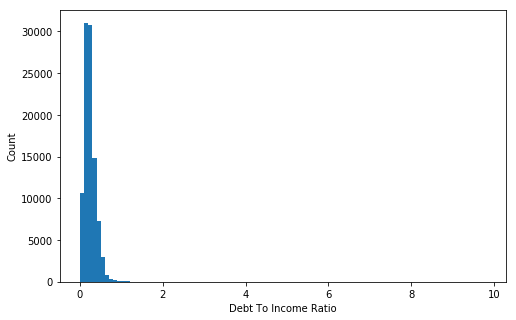

In [25]:
plt.figure(figsize = [8, 5])

# specify bin size
binsize = 0.1;
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize);

# use histogram as it is numerical variable.
plt.hist(data=loan,x='DebtToIncomeRatio',bins=bins);

plt.xlabel("Debt To Income Ratio");
plt.ylabel('Count');

**This plot is strongly positively skewed therefore I used logarithmic scale below:**

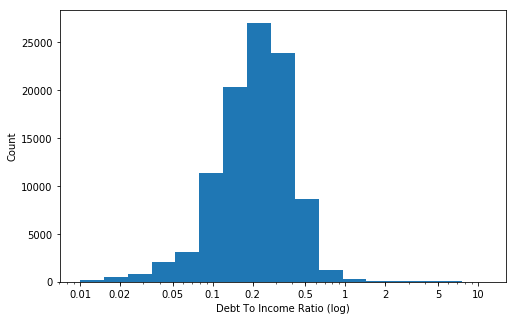

In [26]:
plt.figure(figsize=[8, 5])
# specify bin size
log_binsize = 0.18
bins = 10 ** np.arange(-2, np.log10(loan['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

# use histogram as it is numerical variable.
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')

# use appropriate ticks for log values
plt.xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],[0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10])

plt.xlabel('Debt To Income Ratio (log)')
plt.ylabel('Count')
plt.show()

**Debt to income Ratio of the borrowers are mostly between 0.1 to 0.5. Now we have unimodal distribution if we log the debt to income ratio**

### Income Range

The income range of the borrower at the time the listing was created.

Remove "Not displayed" income range.

In [27]:
loan.drop(loan[(loan.IncomeRange == 'Not displayed')].index, inplace=True)
loan[(loan.IncomeRange == 'Not displayed')]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


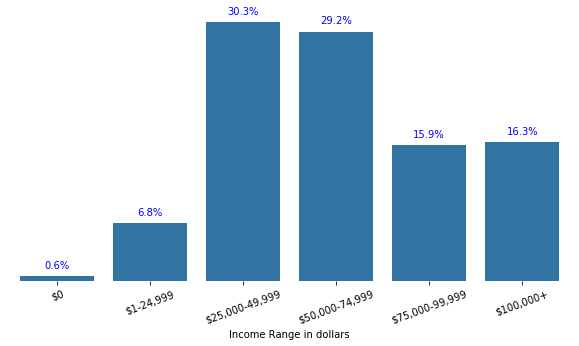

In [28]:
# I ordered the income range from lowest to highest. 
level_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_cat)

plt.figure(figsize = [10, 5]) 

default_color = sb.color_palette()[0];
type_counts=loan.IncomeRange.value_counts()

# use bar charts for categorical variable.
ax=sb.countplot(data = loan, x = 'IncomeRange',color = default_color,);
plt.xticks(rotation = 20)
plt.xlabel("Income Range in dollars");

# remove y axis: get help from:
# https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)

# remove frames, get help from:
# https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add annotations
n_points = loan.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+1000, pct_string, ha = 'center',color = 'b')


**More than half of the borrowers in the range of  25000 - 75000 dollars. It is interesting to see that there are not earners with %0.6 percent and %6.8 of the borrowers are earning 1 to 25000 dollars.**

### Verifiable Income

The borrower indicated they have the required documentation to support their income.

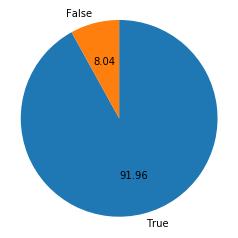

In [29]:
sorted_counts = loan['IncomeVerifiable'].value_counts();

# use pie chart as it is categorical variable and there are only two values.
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,autopct='%.2f');
plt.axis('square');

**Most of the borrowers (%91.96) indicated they have the required documentation to support their income.**

### Stated Monthly Income

The monthly income the borrower stated at the time the listing was created.

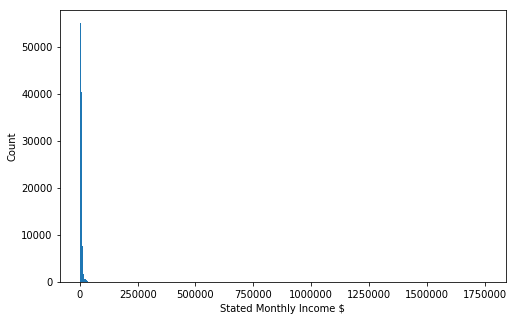

In [30]:
plt.figure(figsize = [8, 5])

# specify appropriate bin size for the plot
binsize = 5000;
bins = np.arange(0, loan['StatedMonthlyIncome'].max()+binsize, binsize);

# use histogram as it is numeric variable.
plt.hist(data=loan,x='StatedMonthlyIncome',bins=bins);

plt.xlabel("Stated Monthly Income $");
plt.ylabel('Count');

**Again this plot is strongly positively skewed therefore I used logarithmic scale below:**

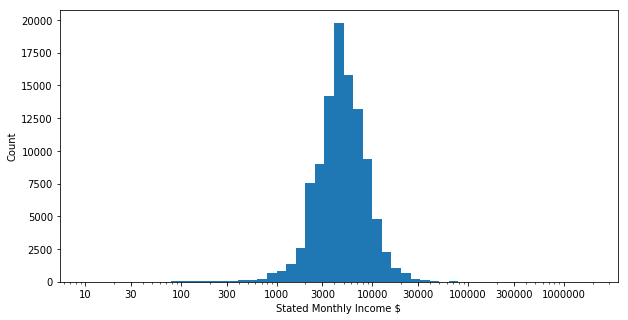

In [31]:
plt.figure(figsize=[10, 5])

# use bin size for log scale values
log_binsize = 0.1
bins = 10 ** np.arange(1, np.log10(loan['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

# use histogram as it is a numerical variable.
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xscale('log')

# use tick marks for log scale
plt.xticks([10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000],[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000])
plt.xlabel('Stated Monthly Income $')
plt.ylabel('Count')
plt.show()

**Most Stated Monthly Income is between 1000 and 30000 dollars. The income distribution is now, unimodal.**

### Original Amount of Loan

The origination amount of the loan.

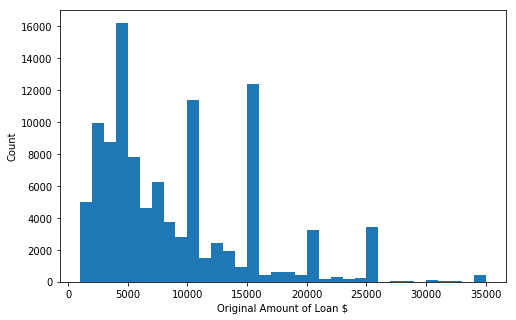

In [32]:
plt.figure(figsize = [8, 5])

# use an appropriate bin size
binsize = 1000;
bins = np.arange(1000, loan['LoanOriginalAmount'].max()+binsize, binsize);

# use histogram as we are exploring numeric variable
plt.hist(data=loan,x='LoanOriginalAmount', bins=bins);
plt.xlabel("Original Amount of Loan $");
plt.ylabel('Count');

**Most of the loans are between 1000 and 15000 dollars.There are peaks at 5000, 10000, 15000, 20000, 25000, 30000 and 35000 dollars.**  

### Monthly Loan Payment

The scheduled monthly loan payment.

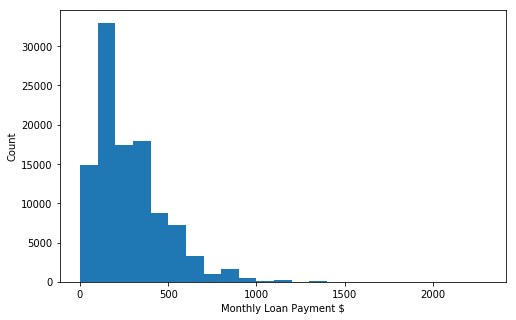

In [33]:
plt.figure(figsize = [8, 5])

# use an appropriate bin size
binsize =100;
bins = np.arange(0, loan['MonthlyLoanPayment'].max()+binsize, binsize);

# use histogram as we are exploring numeric variable
plt.hist(data=loan,x='MonthlyLoanPayment', bins=bins);
plt.xlabel("Monthly Loan Payment $");
plt.ylabel('Count');

**The plot is positively skewed therefore I used logarithmic scale below:**

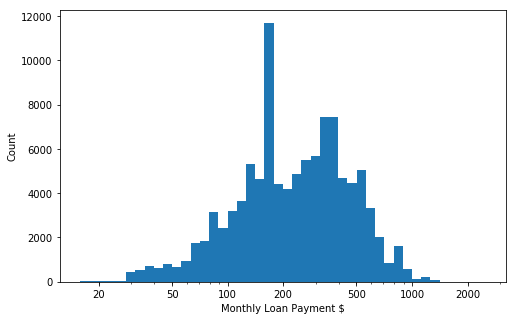

In [34]:
plt.figure(figsize=[8, 5])

# use an appropriate bin size for log scale
log_binsize = 0.05
bins = 10 ** np.arange(1.2, np.log10(loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

# use histogram as we are exploring numeric variable
plt.hist(data = loan, x = 'MonthlyLoanPayment',bins=bins)
plt.xscale('log')

# use tick marks for log scale
plt.xticks([20, 50, 100, 200, 500, 1000, 2000],[20, 50, 100, 200, 500, 1000, 2000])
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('Count')
plt.show()

**Most of the monthly Loan Payments are between 20 and 1400 dollars.The monthly loan payment looks like now have bimodal distribution, with one mode is between 100 to 200 and one mode between 200 to 500**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I've ordered the data from **loan status** as "completed" to status of "chargeoff" I also rename all of the variables include statement "past due" as "Past Due" to reduce the visualization complexity. I also renamed FinalPaymentInProgress as Current since the payment is not completed. Then I remove "cancelled" because there are only 5 loans which are cancelled.

Looking at barplot it can be observed that:
- about half of the loan status is "Current", 
- nearly 1/3 of it is "Completed", 
- %10 of it is "Chargedoff",
- %5  of it is "Defaulted"

**Borrower APR** variable is multimodal. There are some spikes around 0.1 0.2, 0.3 and 0.35. The peak at 0.35 is very high. 

There were outliers around 0 at **Lower Credit Score Range**, I haven't removed this part from the dataset because it may be related with other features I investigated. I draw new histplot with changing the ticks of the plot to remove outliers. This plots looks like a bimodal plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In **Listing Category** feature, I changed numerical values with Categorical Variables because this numerical values was not informative.

When exploring **Borrower State**, I wanted to visualize the features of state on US Map, because there are lots of states and I thought for an audience it is not easy to find which state you want to investigate. I first start with importing **geopandas** a library used for visualization of maps. Then I search for a map of US with borders of states are drawn. I find this map from United States Census Bureau's geographic database, than I joined this database with a database I generated from value_counts of states. I dropped states: *Hawaii* and *Alaska* since these states were distant, making the details of other states are lost. I generated two maps, one of them has detailed view around notheast of US, because this region's state areas were small. The borrower counts are shown with color. 

Also I have ordered **Employment Status** variable started from Employed to Retired. It is also ordered in terms of percentage of borrowers.I removed "Not available" status since it is not informative.

When exploring **Employment Status Duration**, **Debt to Income Ratio**,**Stated Monthly Income** and **Monthly Loan Payment**  features, I put the variables on a log scale because the plot is strongly positively skewed. What I get from **Employment Status Duration**, **Debt to Income Ratio**,**Stated Monthly Income** is a unimodal slightly negative skewed distribution and from **Monthly Loan Payment** bimodal distribution.

I also ordered the data as **Income Range** of lowest to highest. I removed not displayed values. 

At **Original Amount of Loan**, there are spikes at multiple of 5000. I think these values are standard amounts of loans choosen for easy calculation.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data. I have divided categorical variables to three parts otherwise there is no space when plotting.

In [35]:
numeric_vars = ['BorrowerAPR', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars_1 = ['IsBorrowerHomeowner','IncomeVerifiable']
categoric_vars_2 = ['LoanStatus', 'ListingCategory']
categoric_vars_3 = ['EmploymentStatus','IncomeRange']

**I didn't add BorrowerState here to categoric_vars because I will explore it on the map**

### Numerical vs Numerical Bivariate Exploration

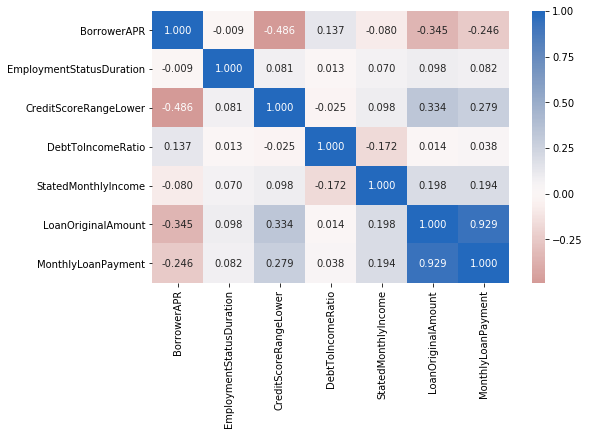

In [36]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\Mehmet\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Mehmet\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mehmet\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


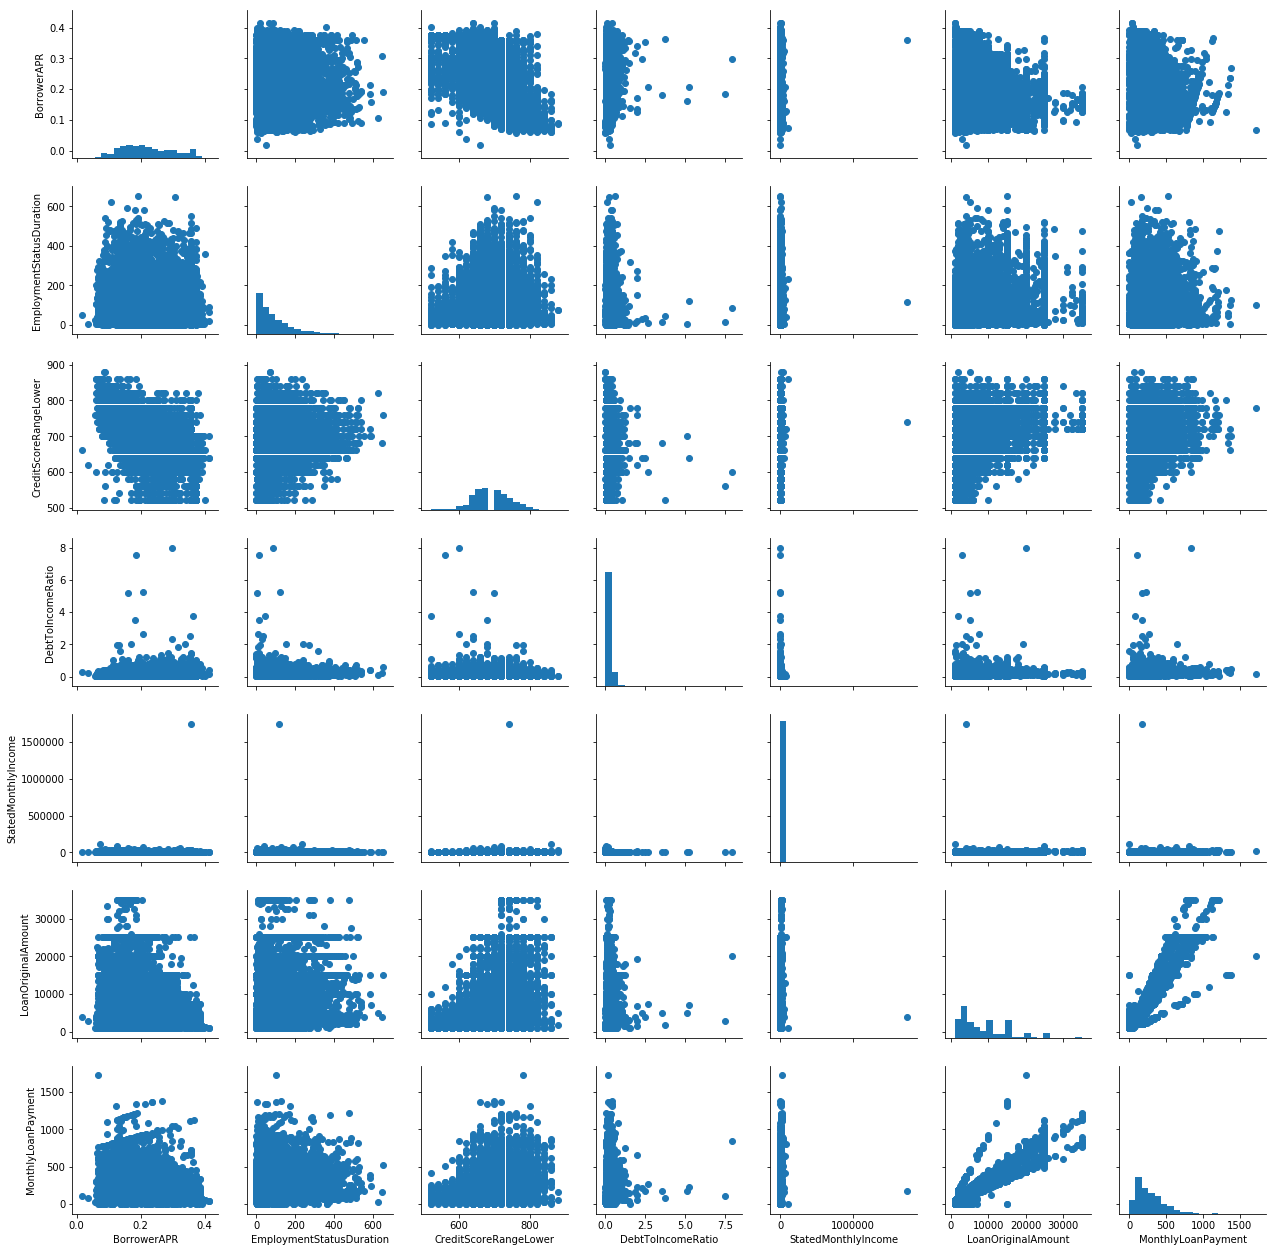

In [37]:
# plot matrix: sample 10000 loans so that plots are clearer and
# they render faster
samples = np.random.choice(loan.shape[0],  10000, replace = False)
loan_samp = loan.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, **LoanOriginalAmount** and **MonthlyLoanPayment** are highly linearly correlated with one another. 

- BorrowerAPR-CreditScoreRangeLower
- LoanOriginalAmount-BorrowerAPR
- CreditScoreRangeLower-LoanOriginalAmount

are moderately correlated. 

I won't perform any further analyses with other variable pairs since they don't look like they'll be of much further interest.

Let's move on to looking at how **BorrowerAPR** and **CreditScoreRangeLower** correlate with the categorical variables.

### Numerical vs Categorical Bivariate Exploration

<Figure size 720x720 with 0 Axes>

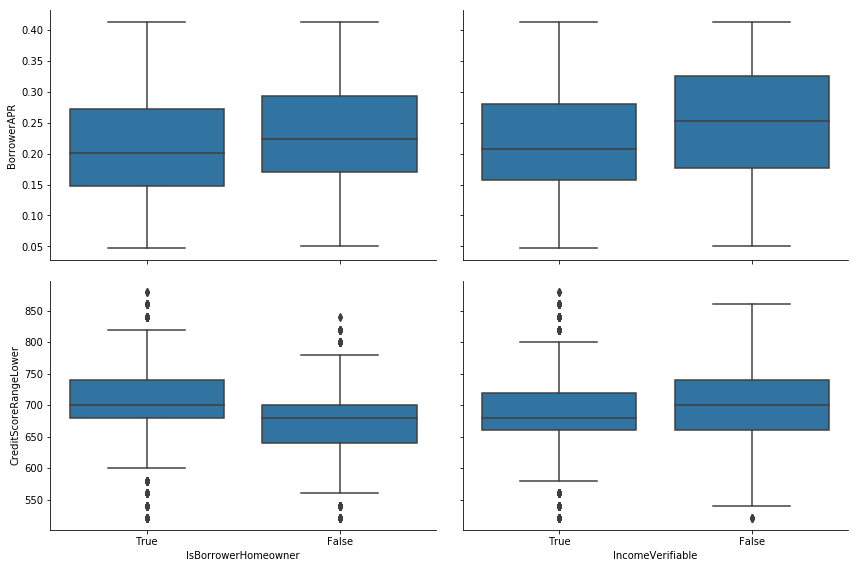

In [38]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(loan.shape[0], 20000, replace = False)
loan_samp = loan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'CreditScoreRangeLower'], x_vars = categoric_vars_1,
                height = 4, aspect = 1.5);
g.map(boxgrid)
plt
plt.show();

**Home Owner's and Borrowers with Verifiable Income have lower Borrower APR, which is expected.** 

**I expected that Home Owners has higher average credit score, but didn't expect borrowers with verifiable income have lower average credit score.**

**This will be worth investigating more later on.**

<Figure size 720x720 with 0 Axes>

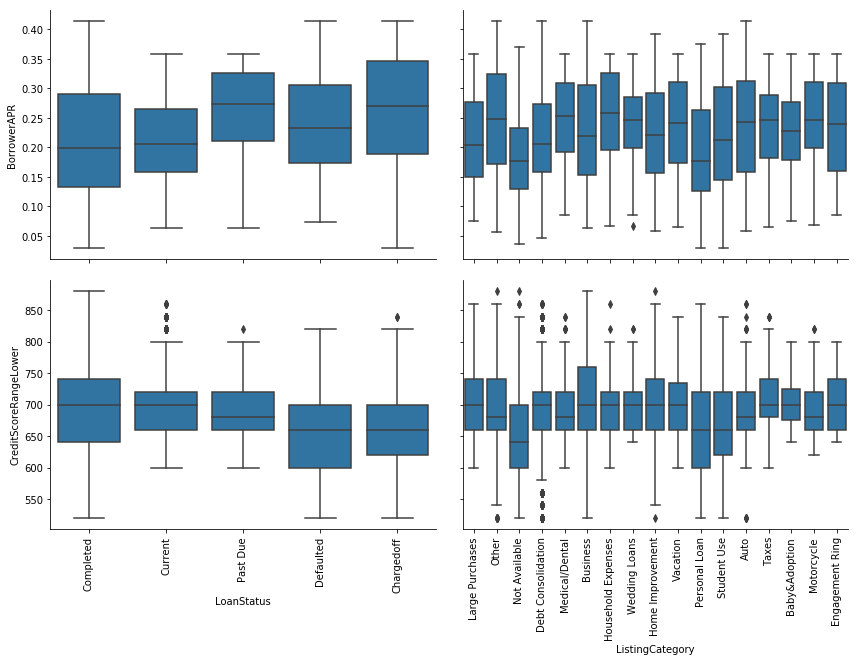

In [39]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(loan.shape[0], 20000, replace = False)
loan_samp = loan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'CreditScoreRangeLower'], x_vars = categoric_vars_2,
                height = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

**Loan status of Borrowers who have higher credit score are more likely to be completed, as expected. Also loans with lower BorrowerAPR are likely to be completed too which is also expected.**

**The thing I suprised a lot is the lower scores of the loans borrowed for Student Use. This may be related with unemployment status of students. I will investigate it below.**

<Figure size 720x720 with 0 Axes>

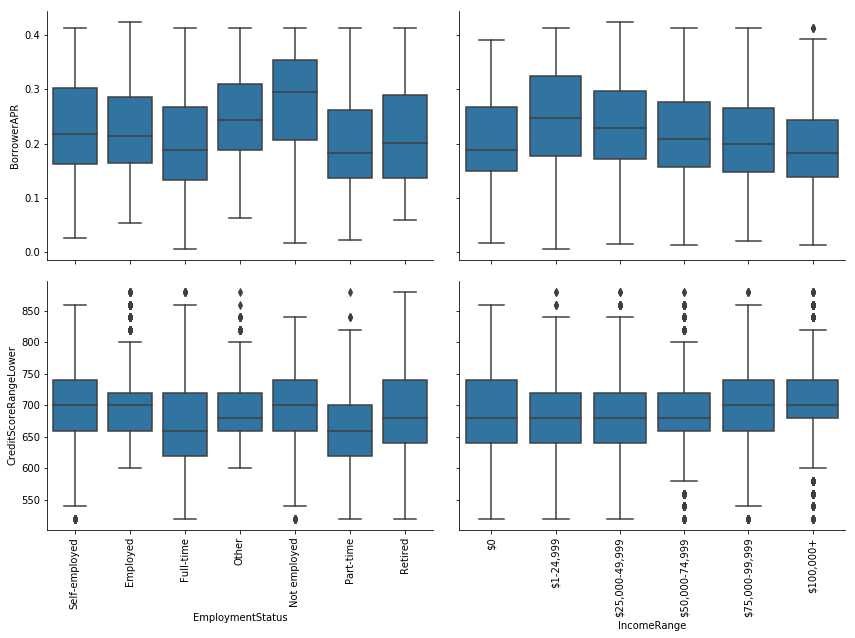

In [40]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'CreditScoreRangeLower'], x_vars = categoric_vars_3,
                height = 4, aspect = 1.5);
g.map(boxgrid);
plt.show();

**Borrowers with low income range likely to have higher Borrower APR and lower credit score.**

### Categorical vs Categorical Bivariate Exploration

Finally, let's look at relationships between categorical features.

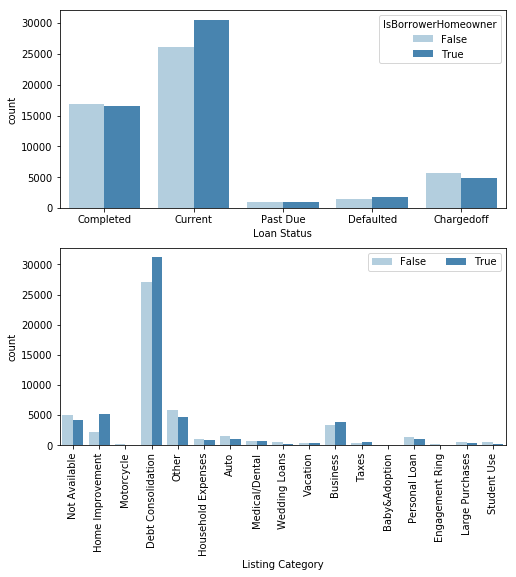

In [41]:
plt.figure(figsize = [8, 8])
# As there are 6 categorical variables, there are 15 different relationship between variables. However I will not cover all of them 

# I will not cover IsBorrowerHomeowner vs IncomeVerifyable as it is obvious.
# subplot 1: loan Status vs Owning Home
plt.subplot(2, 1, 1)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xlabel('Loan Status')

# subplot 2: Loan Categories vs. Owning Home
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan, x = 'ListingCategory', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 90)
plt.xlabel('Listing Category')

plt.show()

**Not home owners are less likely to borrow a loan for home improvement which is expected. There is not significant difference between home owners and not home owners for other categories and loan statuses.**

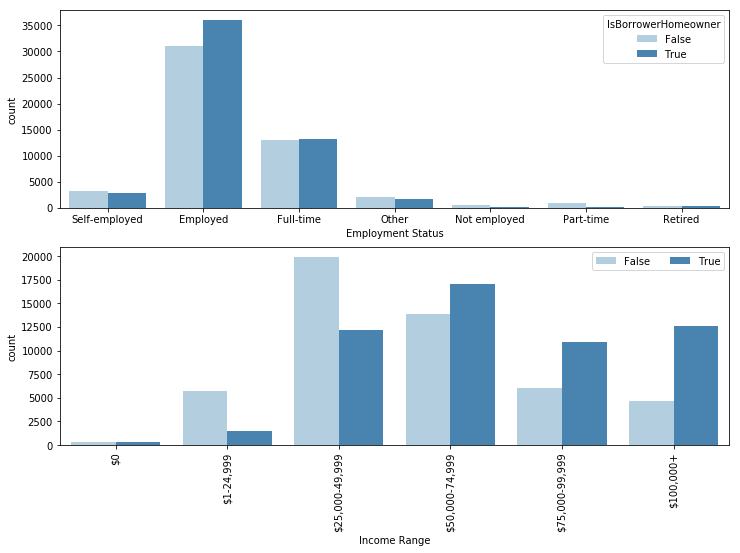

In [42]:
plt.figure(figsize = [12, 8])
# subplot 1: loan Status vs Owning Home
plt.subplot(2, 1, 1)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xlabel('Employment Status')
# subplot 2: Loan Categories vs. Owning Home
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.show()

**There is no significant difference between home owners and not home owners for employment status. People with less income are less likely to own a house as expected.**

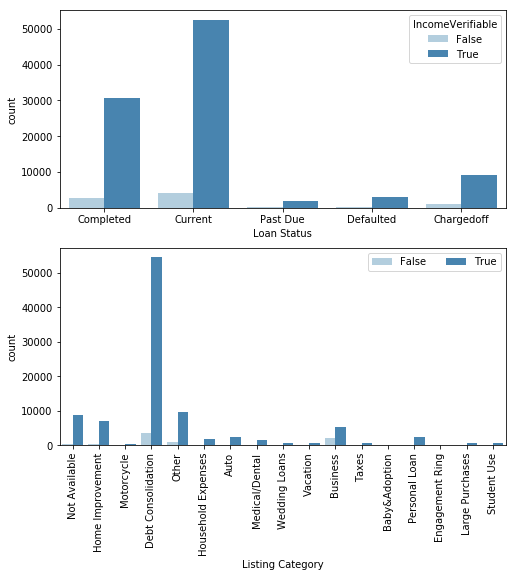

In [43]:
# As it is meaningless to compare income range between income verifiable and not verifiable, I will not cover this relationship.
plt.figure(figsize = [8, 8])
# As there are 6 categorical variables, there are 15 different relationship between variables. However I will not cover all of them 

# I will not cover IsBorrowerHomeowner vs IncomeVerifyable as it is obvious.
# subplot 1: loan Status vs Owning Home
plt.subplot(2, 1, 1)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'Blues')
plt.xlabel('Loan Status')

# subplot 2: Loan Categories vs. Owning Home
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan, x = 'ListingCategory', hue = 'IncomeVerifiable', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 90)
plt.xlabel('Listing Category')
plt.show()

**This is not helpful. We know that most of the borrower's income is verifiable. (around %92) we should compare proportions, not counts!**

In [44]:
# I've found from here a way to show proportions in y axis:
# https://github.com/mwaskom/seaborn/issues/1027

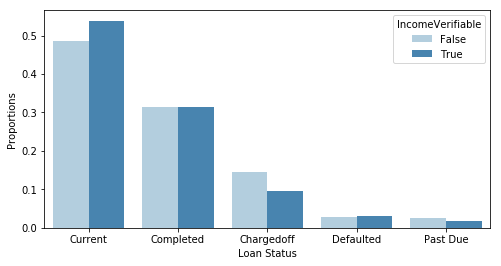

In [45]:
plt.figure(figsize = [8, 4])

# show proportions in y axis
prop_loan= (loan["LoanStatus"]
           .groupby(loan["IncomeVerifiable"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='LoanStatus', y='Proportions', hue='IncomeVerifiable', data=prop_loan, palette = 'Blues');
plt.xlabel('Loan Status');

**Here we can see similar proportions for borrowers with income verifiable and not verifiable. There isn't any significant difference.**

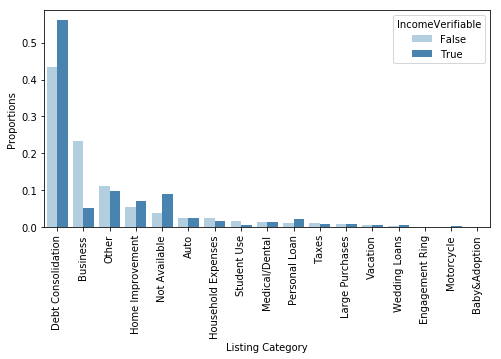

In [46]:
plt.figure(figsize = [8, 4])

# show proportions in y axis
prop_loan= (loan["ListingCategory"]
           .groupby(loan["IncomeVerifiable"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='ListingCategory', y='Proportions', hue='IncomeVerifiable', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Listing Category');

**The borrowers with income not verifiable has a lot higher proportion of Business Category than income verifiable.**

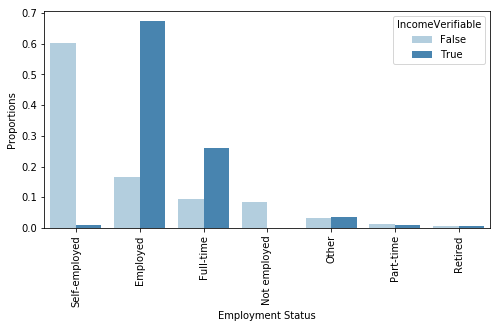

In [47]:
plt.figure(figsize = [8, 4])

# show proportions in y axis
prop_loan= (loan["EmploymentStatus"]
           .groupby(loan["IncomeVerifiable"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='EmploymentStatus', y='Proportions', hue='IncomeVerifiable', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Employment Status');

**Most of borrowers with income not verifiable are self employed.**

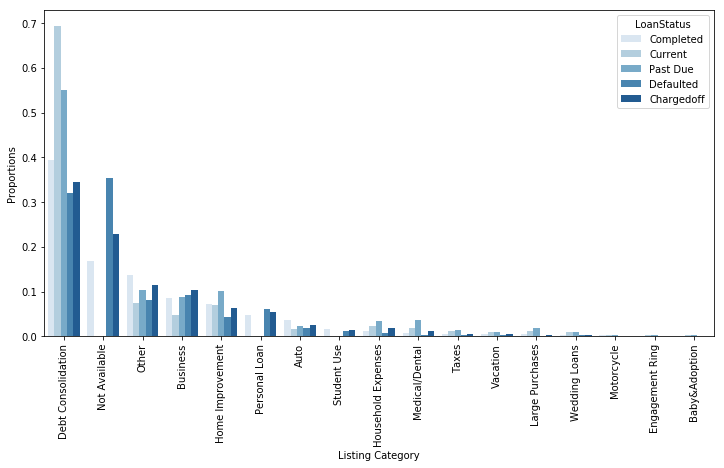

In [48]:
plt.figure(figsize = [12, 6])

# show proportions in y axis
prop_loan= (loan["ListingCategory"]
           .groupby(loan["LoanStatus"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='ListingCategory', y='Proportions', hue='LoanStatus', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Listing Category');

**Highest defaulted and chargedoff rates are in "not available" as expected.**

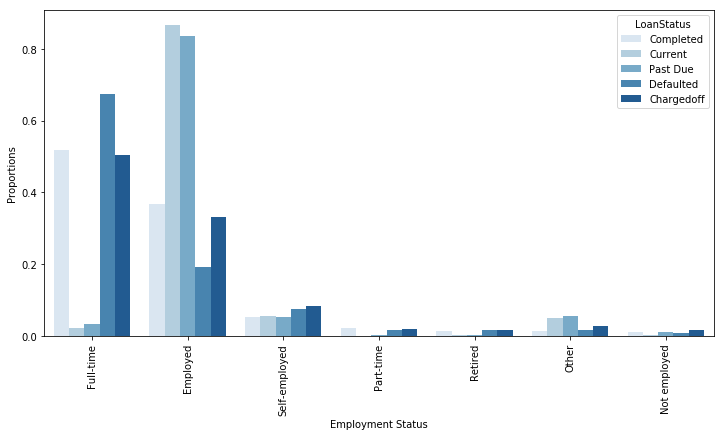

In [49]:
plt.figure(figsize = [12, 6])

# show proportions in y axis
prop_loan= (loan["EmploymentStatus"]
           .groupby(loan["LoanStatus"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='EmploymentStatus', y='Proportions', hue='LoanStatus', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Employment Status');

**Highest defaulted and chargedoff rates are in "full-time" which is not expected for me.** 

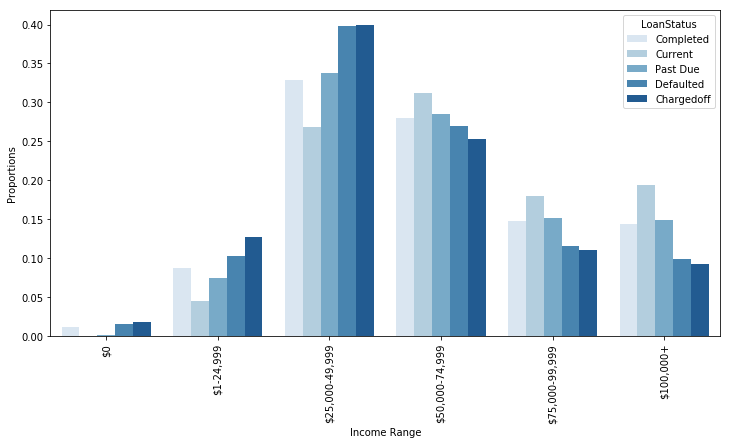

In [50]:
plt.figure(figsize = [12, 6])

# show proportions in y axis
prop_loan= (loan["IncomeRange"]
           .groupby(loan["LoanStatus"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

# order income range from minimum to maximum
level_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
prop_loan['IncomeRange'] = prop_loan['IncomeRange'].astype(ordered_cat)

sb.barplot(x='IncomeRange', y='Proportions', hue='LoanStatus', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Income Range');

**Highest defaulted and chargedoff rates are in lower income ranges as expected**

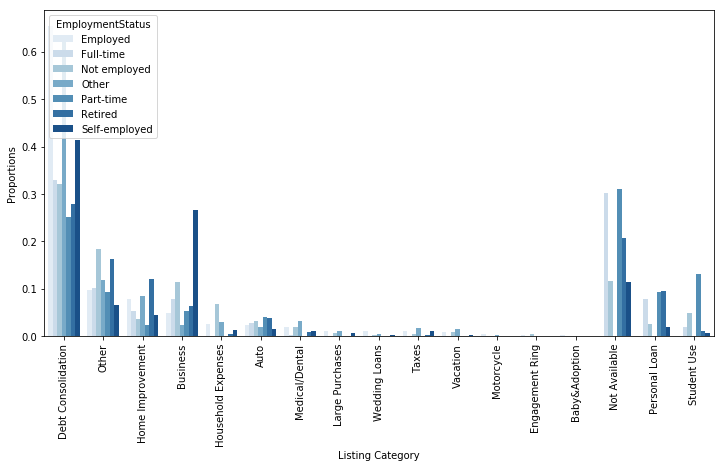

In [51]:
plt.figure(figsize = [12, 6])

# show proportions in y axis
prop_loan= (loan["ListingCategory"]
           .groupby(loan["EmploymentStatus"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());

sb.barplot(x='ListingCategory', y='Proportions', hue='EmploymentStatus', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Listing Category');

**Lots of chart junk here. I will try to use heatmap.**

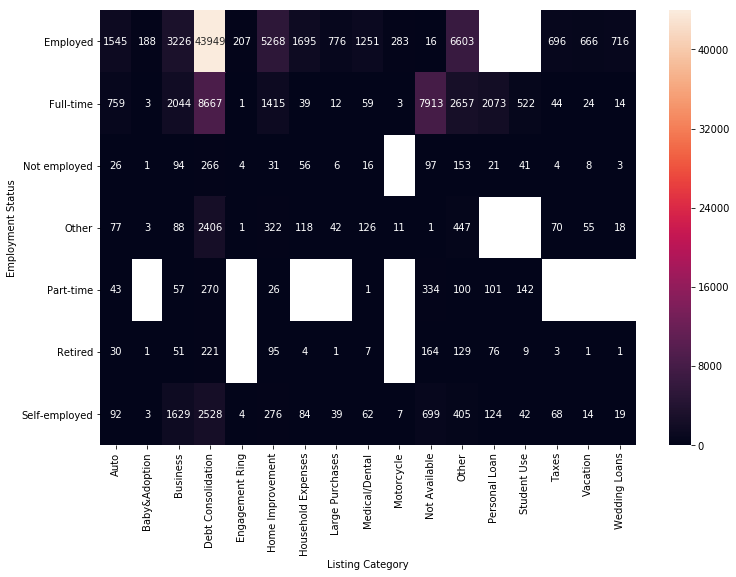

In [52]:
plt.figure(figsize = [12, 8])
ct_counts = loan.groupby(['ListingCategory', 'EmploymentStatus']).size();
ct_counts = ct_counts.reset_index(name = 'count');
ct_counts = ct_counts.pivot(index = 'EmploymentStatus', columns = 'ListingCategory', values = 'count');

sb.heatmap(ct_counts, annot = True, fmt = '.0f');
plt.xlabel('Listing Category');
plt.ylabel('Employment Status');

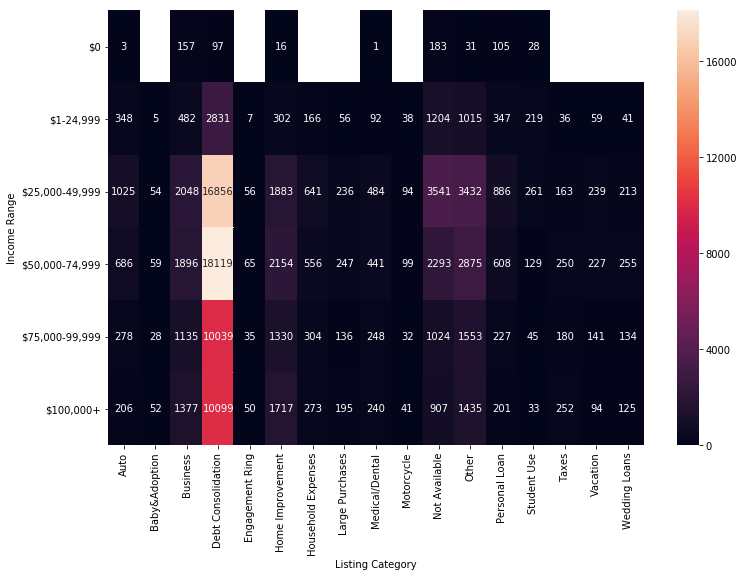

In [53]:
plt.figure(figsize = [12, 8])
ct_counts = loan.groupby(['ListingCategory', 'IncomeRange']).size();
ct_counts = ct_counts.reset_index(name = 'count');
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'ListingCategory', values = 'count');

sb.heatmap(ct_counts, annot = True, fmt = '.0f');
plt.xlabel('Listing Category');
plt.ylabel('Income Range');

**With the preliminary look at bivariate relationships out of the way, I want to look at Bivariate Exploration of Borrower State.**

These are:
- Rate of completed loans per state
- Borrower APR mean per state
- Credit Score per state
- Debt to Income ratio per state 

### Completed Loan Rate of Borrower States

In [54]:
# Select Loans which have status as "Completed"
completed_loans=loan[loan["LoanStatus"]=="Completed"]

# Count Completed Loans for each state then divide by all loan statuses count for each state: 
completed_props=completed_loans["BorrowerState"].value_counts()/loan["BorrowerState"].value_counts()

# Cast to dataframe
completed_props_df = completed_props.rename_axis('state').reset_index(name='Completed Proportions')
completed_props_df.head(5)

,state,Completed Proportions
0,AK,0.368687
1,AL,0.288875
2,AR,0.230952
3,AZ,0.318106
4,CA,0.331255


In [55]:
merged_df = map_df.merge(completed_props_df, left_on='STUSPS', right_on='state')
merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,Completed Proportions
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",WV,0.314516
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",IL,0.336736
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",MD,0.307164
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",ID,0.352014
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",VT,0.269608


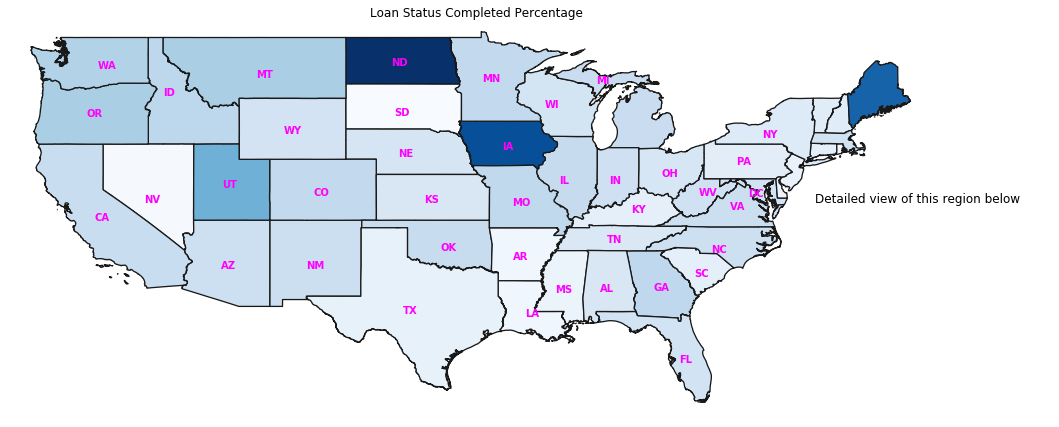

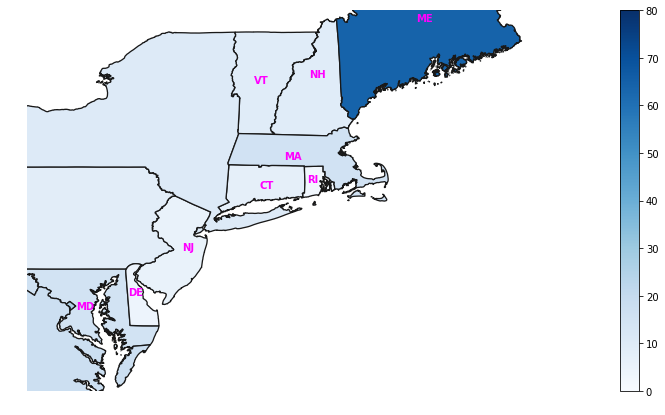

In [56]:
merged_df.drop(merged_df[(merged_df.STUSPS == "AK") | (merged_df.STUSPS == "HI")].index, inplace=True)

# Need further detailed view of new york region because around this region states are very small.
fig,ax1 = plt.subplots(1,figsize=(20, 7))
fig,ax2 = plt.subplots(1,figsize=(20, 7))

# To show states on the map, I need to get the representative point location in the map. Used this source
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons/38902492
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

# Plot both maps 
ax1 = merged_df.plot(column ='Completed Proportions',alpha=1,linewidth=1.3,ax=ax1,edgecolor='1.1',cmap='Blues')
ax2 = merged_df.plot(column ='Completed Proportions',alpha=1,linewidth=1.3,ax=ax2,edgecolor='1.1',cmap='Blues')
for idx, row in merged_df.iterrows():
    if not row.STUSPS in (['ME','VT','NH','MA','RI','CT','NJ','DE','MD']): 
        ax1.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.6,row['coords'][1]-0.3),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
    else:
        ax2.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.15,row['coords'][1]),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
# As some states such as Hawaii and Alaska were very distant, other states was shown very small, so I had to set axis limits to
# highlight other states.
ax1.set_xlim([-125, -66])
ax1.set_ylim([25, 50])
# these axis limits are for detailed region:
ax2.set_xlim([-78, -66])
ax2.set_ylim([37, 45.5])
ax1.axis("off")
ax2.axis("off")
# add a title
ax1.set_title("Loan Status Completed Percentage");
# create an annotation for the data source
ax1.annotate("Detailed view of this region below",xy=(0.77, 0.55),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12)
# limits for colorbar:(counts)
vmin, vmax = 0, 80
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

States **Maine (ME)**, **North Dakota (ND)** and **Iowa (IA)** has highest loan completion rates, whereas states **Nevada (NV)** and **South Dakota (SD)** has lowest.

### Borrower APR mean of Borrower States

In [57]:
apr_means=loan["BorrowerAPR"].groupby(loan["BorrowerState"]).mean()
#Completed Proportions

# Cast to dataframe
apr_means_df = apr_means.rename_axis('state').reset_index(name='Apr Means')
apr_means_df.head(5)

,state,Apr Means
0,AK,0.213976
1,AL,0.238108
2,AR,0.237655
3,AZ,0.217898
4,CA,0.217842


In [58]:
merged_df = map_df.merge(apr_means_df, left_on='STUSPS', right_on='state')
merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,Apr Means
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",WV,0.218599
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",IL,0.217798
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",MD,0.221510
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",ID,0.230409
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",VT,0.215379


In [59]:
print (merged_df['Apr Means'].min(),merged_df['Apr Means'].max())

0.17806470238095234 0.2381076485461439


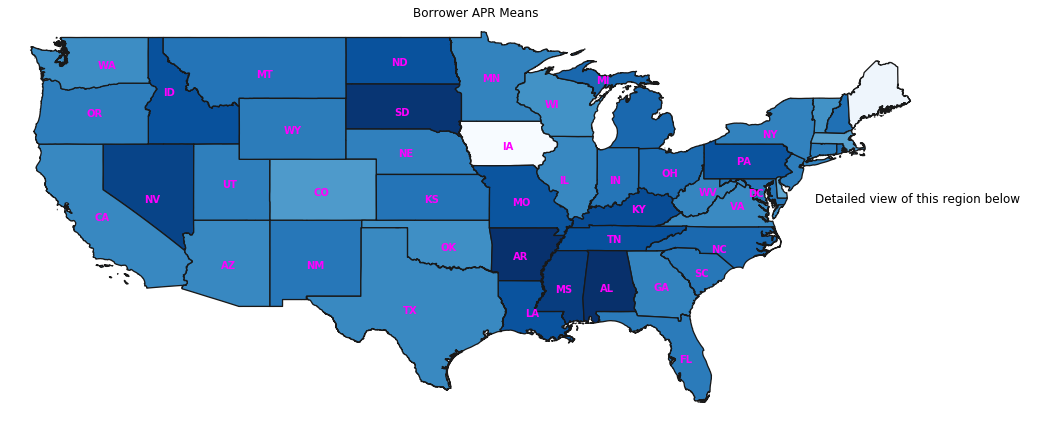

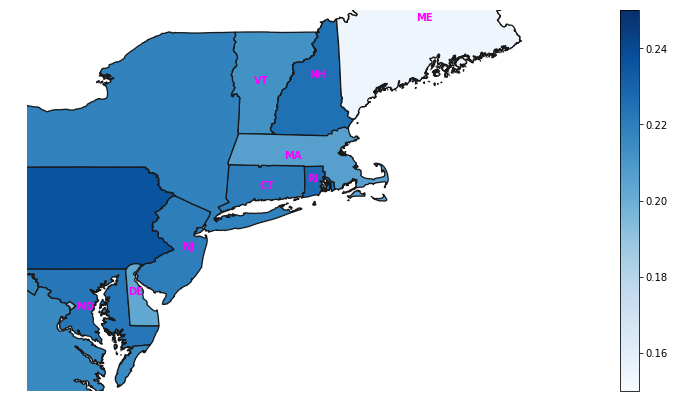

In [60]:
merged_df.drop(merged_df[(merged_df.STUSPS == "AK") | (merged_df.STUSPS == "HI")].index, inplace=True)

# Need further detailed view of new york region because around this region states are very small.
fig,ax1 = plt.subplots(1,figsize=(20, 7))
fig,ax2 = plt.subplots(1,figsize=(20, 7))

# To show states on the map, I need to get the representative point location in the map. Used this source
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons/38902492
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

# Plot both maps 
ax1 = merged_df.plot(column ='Apr Means',alpha=1,linewidth=1.3,ax=ax1,edgecolor='1.1',cmap='Blues')
ax2 = merged_df.plot(column ='Apr Means',alpha=1,linewidth=1.3,ax=ax2,edgecolor='1.1',cmap='Blues')
for idx, row in merged_df.iterrows():
    if not row.STUSPS in (['ME','VT','NH','MA','RI','CT','NJ','DE','MD']): 
        ax1.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.6,row['coords'][1]-0.3),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
    else:
        ax2.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.15,row['coords'][1]),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
# As some states such as Hawaii and Alaska were very distant, other states was shown very small, so I had to set axis limits to
# highlight other states.
ax1.set_xlim([-125, -66])
ax1.set_ylim([25, 50])
# these axis limits are for detailed region:
ax2.set_xlim([-78, -66])
ax2.set_ylim([37, 45.5])
ax1.axis("off")
ax2.axis("off")
# add a title
ax1.set_title("Borrower APR Means");
# create an annotation for the data source
ax1.annotate("Detailed view of this region below",xy=(0.77, 0.55),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12)
# limits for colorbar:(counts)
vmin, vmax = 0.15, 0.25
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

States **South Dakota (SD)**, **Alabama (AL)** and **Arkansas (AR)** has highest Borrower APR whereas **Maine (ME)** and **Iowa (IA)** has lowest.

### Credit Score of Borrower States

In [61]:
credit_score_means=loan["CreditScoreRangeLower"].groupby(loan["BorrowerState"]).mean()

# Cast to dataframe
credit_score_means_df = credit_score_means.rename_axis('state').reset_index(name='Credit Score Means')
credit_score_means_df.head(5)

,state,Credit Score Means
0,AK,698.181818
1,AL,676.713021
2,AR,685.928571
3,AZ,689.136490
4,CA,688.895099


In [62]:
merged_df = map_df.merge(credit_score_means_df, left_on='STUSPS', right_on='state')
merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,Credit Score Means
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",WV,695.860215
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",IL,687.139588
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",MD,697.684515
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",ID,678.318739
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",VT,696.764706


In [63]:
print (merged_df['Credit Score Means'].min(),merged_df['Credit Score Means'].max())

629.047619047619 705.2525252525253


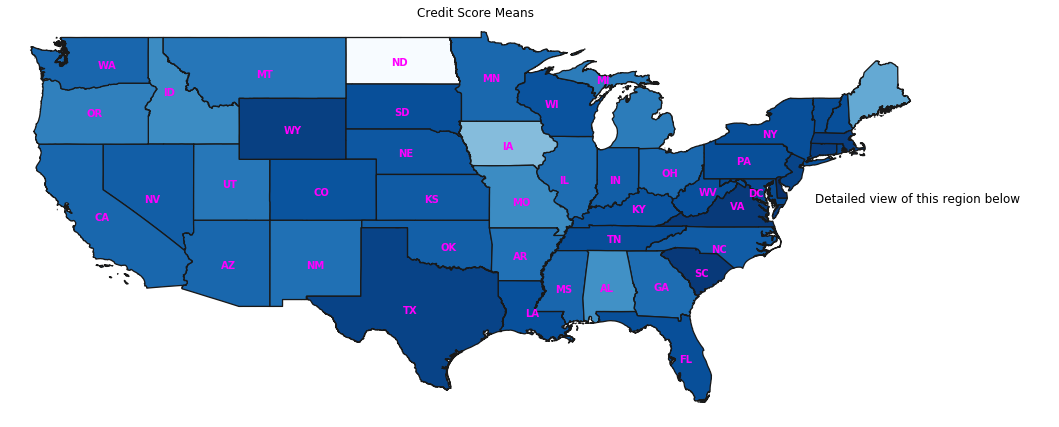

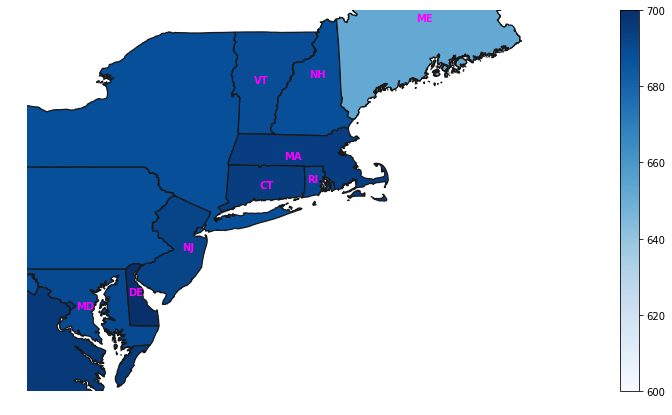

In [64]:
merged_df.drop(merged_df[(merged_df.STUSPS == "AK") | (merged_df.STUSPS == "HI")].index, inplace=True)

# Need further detailed view of new york region because around this region states are very small.
fig,ax1 = plt.subplots(1,figsize=(20, 7))
fig,ax2 = plt.subplots(1,figsize=(20, 7))

# To show states on the map, I need to get the representative point location in the map. Used this source
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons/38902492
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

# Plot both maps 
ax1 = merged_df.plot(column ='Credit Score Means',alpha=1,linewidth=1.3,ax=ax1,edgecolor='1.1',cmap='Blues')
ax2 = merged_df.plot(column ='Credit Score Means',alpha=1,linewidth=1.3,ax=ax2,edgecolor='1.1',cmap='Blues')
for idx, row in merged_df.iterrows():
    if not row.STUSPS in (['ME','VT','NH','MA','RI','CT','NJ','DE','MD']): 
        ax1.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.6,row['coords'][1]-0.3),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
    else:
        ax2.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.15,row['coords'][1]),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
# As some states such as Hawaii and Alaska were very distant, other states was shown very small, so I had to set axis limits to
# highlight other states.
ax1.set_xlim([-125, -66])
ax1.set_ylim([25, 50])
# these axis limits are for detailed region:
ax2.set_xlim([-78, -66])
ax2.set_ylim([37, 45.5])
ax1.axis("off")
ax2.axis("off")
# add a title
ax1.set_title("Credit Score Means");
# create an annotation for the data source
ax1.annotate("Detailed view of this region below",xy=(0.77, 0.55),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12)
# limits for colorbar:(counts)
vmin, vmax = 600,700
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

States **Wyooming (WY)**, **South Carolina (SC)**, **Virginia (VA)**,  and **Delaware (DE)** has highest Credit Scores whereas **North Dakota (ND)** and **Iowa (IA)** has lowest.

### Debt to Income ratio per state

In [65]:
debt_to_income_ratio_means=loan["DebtToIncomeRatio"].groupby(loan["BorrowerState"]).mean()

# Cast to dataframe
debt_to_income_ratio_means_df = debt_to_income_ratio_means.rename_axis('state').reset_index(name='DebtToIncomeRatio')
debt_to_income_ratio_means_df.head(5)

,state,DebtToIncomeRatio
0,AK,0.250773
1,AL,0.281966
2,AR,0.296169
3,AZ,0.239982
4,CA,0.231676


In [66]:
merged_df = map_df.merge(debt_to_income_ratio_means_df, left_on='STUSPS', right_on='state')
merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,DebtToIncomeRatio
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",WV,0.287076
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",IL,0.247733
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",MD,0.233991
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",ID,0.298447
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",VT,0.281316


In [67]:
print (merged_df['DebtToIncomeRatio'].min(),merged_df['DebtToIncomeRatio'].max())

0.19922005571030652 0.31712765957446815


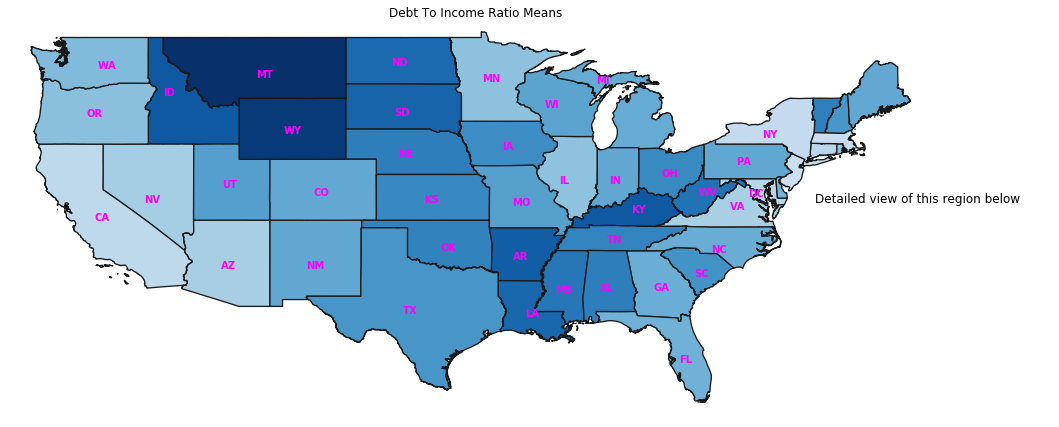

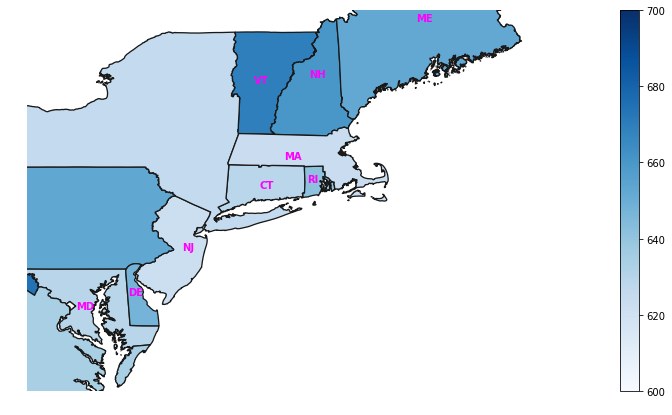

In [68]:
merged_df.drop(merged_df[(merged_df.STUSPS == "AK") | (merged_df.STUSPS == "HI")].index, inplace=True)

# Need further detailed view of new york region because around this region states are very small.
fig,ax1 = plt.subplots(1,figsize=(20, 7))
fig,ax2 = plt.subplots(1,figsize=(20, 7))

# To show states on the map, I need to get the representative point location in the map. Used this source
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons/38902492
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

# Plot both maps 
ax1 = merged_df.plot(column ='DebtToIncomeRatio',alpha=1,linewidth=1.3,ax=ax1,edgecolor='1.1',cmap='Blues')
ax2 = merged_df.plot(column ='DebtToIncomeRatio',alpha=1,linewidth=1.3,ax=ax2,edgecolor='1.1',cmap='Blues')
for idx, row in merged_df.iterrows():
    if not row.STUSPS in (['ME','VT','NH','MA','RI','CT','NJ','DE','MD']): 
        ax1.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.6,row['coords'][1]-0.3),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
    else:
        ax2.annotate(s=row['STUSPS'], xy=(row['coords'][0]-0.15,row['coords'][1]),horizontalalignment='left',fontsize=10, color="magenta",weight = 'bold')
# As some states such as Hawaii and Alaska were very distant, other states was shown very small, so I had to set axis limits to
# highlight other states.
ax1.set_xlim([-125, -66])
ax1.set_ylim([25, 50])
# these axis limits are for detailed region:
ax2.set_xlim([-78, -66])
ax2.set_ylim([37, 45.5])
ax1.axis("off")
ax2.axis("off")
# add a title
ax1.set_title("Debt To Income Ratio Means");
# create an annotation for the data source
ax1.annotate("Detailed view of this region below",xy=(0.77, 0.55),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12)
# limits for colorbar:(counts)
vmin, vmax = 600,700
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

States **Montana (MT)**, **Wyooming (WY)**, and **Idaho (ID)**, has highest debt to income ratio whereas **California (CA)**, **New York (NY)**, **Virginia (VA)** has lowest.

### BorrowerAPR - CreditScoreRangeLower Relationship

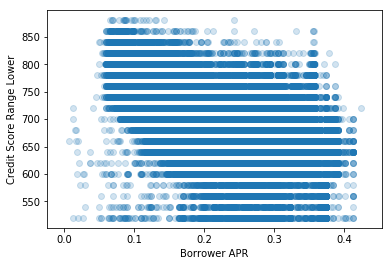

In [69]:
plt.scatter(data = loan, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', alpha = 1/5);
plt.xlabel('Borrower APR');
plt.ylabel('Credit Score Range Lower');

**Credit score and Borrower APR are negatively correlated, meaning that Borrower APR increases as Credit Score decreases, vice versa.**

### LoanOriginalAmount - BorrowerAPR Relationship

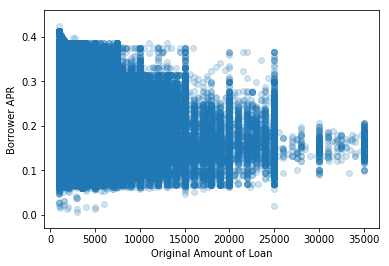

In [70]:
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/5);
plt.xlabel('Original Amount of Loan');
plt.ylabel('Borrower APR');

**Borrower APR and Original Amount of loan are negatively correlated. As Original Amount of Loan increases Borrower APR decreases.**

### LoanOriginalAmount - CreditScoreRangeLower Relationship

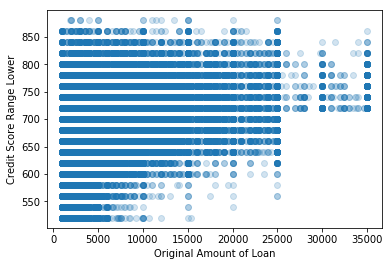

In [71]:
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', alpha = 1/5);
plt.xlabel('Original Amount of Loan');
plt.ylabel('Credit Score Range Lower');

**There is positive correlation between Credit Score and Original loan amount.** 

**Notes:**

- CreditScoreRangeLower is generally lower for borrowers who has income verifiable. The reason for this can be observed in ListingCategory vs IncomeVerifiable clustered bar chart and ListingCategory vs CreditScoreRangeLower box plot. Borrowers who has income not verifiable are more likely to apply for Business Category, and Business Category is likely to have higher Credit Score.

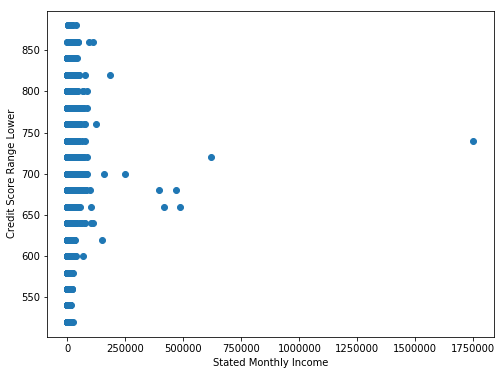

In [72]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
plt.scatter(data = loan, y = 'CreditScoreRangeLower', x = 'StatedMonthlyIncome', color = base_color);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Credit Score Range Lower');

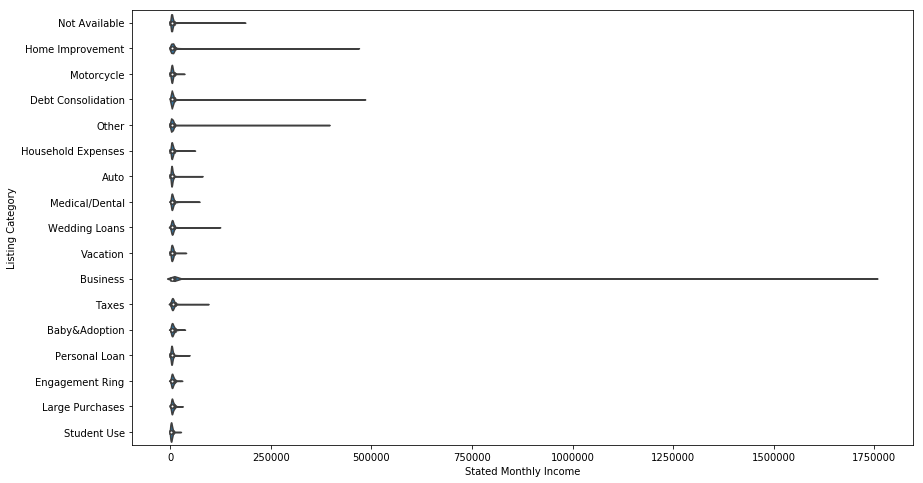

In [73]:
plt.figure(figsize = [14, 8])
base_color = sb.color_palette()[0]
sb.violinplot(data = loan, y = 'ListingCategory', x = 'StatedMonthlyIncome', color = base_color);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Listing Category');

**This is not helpful. Let's try to change x-axis limits**

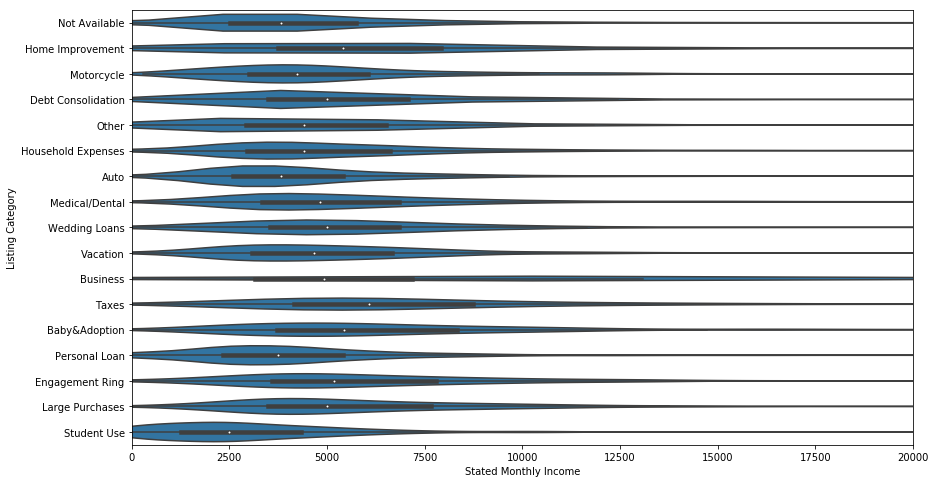

In [74]:
plt.figure(figsize = [14, 8])
base_color = sb.color_palette()[0]
sb.violinplot(data = loan, y = 'ListingCategory', x = 'StatedMonthlyIncome', color = base_color);
plt.xlim(0,20000);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Listing Category');

**This is again, not perfect. However, we can see that Category labeled as "Student Use" are more likely to have lower stated monthly income which may be related with lower credit scores.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Borrower APR and Credit Score Range Lower has negative moderate correlation. Borrower APR has moderate negative correlation with LoanOriginalAmount too. CreditScoreRangeLower and LoanOriginalAmount are moderately positively correlated. 

Business Category is likely to have higher Credit Score. Loan status of Borrowers who have higher credit score are more likely to be completed, as expected. Also loans with lower BorrowerAPR are likely to be completed too which is also expected. CreditScoreRangeLower is generally lower for borrowers who has income verifiable. 

The higher the income range the higher credit score. Borrowers with low income range likely to have higher Borrower APR.

States Maine (ME), North Dakota (ND) and Iowa (IA) has highest loan completion rates, whereas states Nevada (NV) and South Dakota (SD) has lowest.

States South Dakota (SD), Alabama (AL) and Arkansas (AR) has highest Borrower APR whereas Maine (ME) and Iowa (IA) has lowest.

States Wyooming (WY), South Carolina (SC), Virginia (VA), and Delaware (DE) has highest Credit Scores whereas North Dakota (ND) and Iowa (IA) has lowest.

Category labeled as "Student Use" are more likely to have lower stated monthly income which may be related with lower credit scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LoanOriginalAmount and MonthlyLoanPayment are highly positively correlated with one another which is expected. Other variables have weak correlation so they won't be explored further.

Borrowers who has income not verifiable are more likely to apply for Business Category.The borrowers with income not verifiable has a lot higher proportion of Business Category than income verifiable.

Most of borrowers with income not verifiable are self employed.

Highest defaulted and chargedoff rates are in lower income ranges which is expected.

States Montana (MT), Wyooming (WY), and Idaho (ID), has highest debt to income ratio whereas California (CA), New York (NY), Virginia (VA) has lowest.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical measures play into the relationship between Credit Score and Borrower APR.

In [75]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.5+0.02, 0.02)
    bins_y = np.arange(0, 1000+10, 10)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

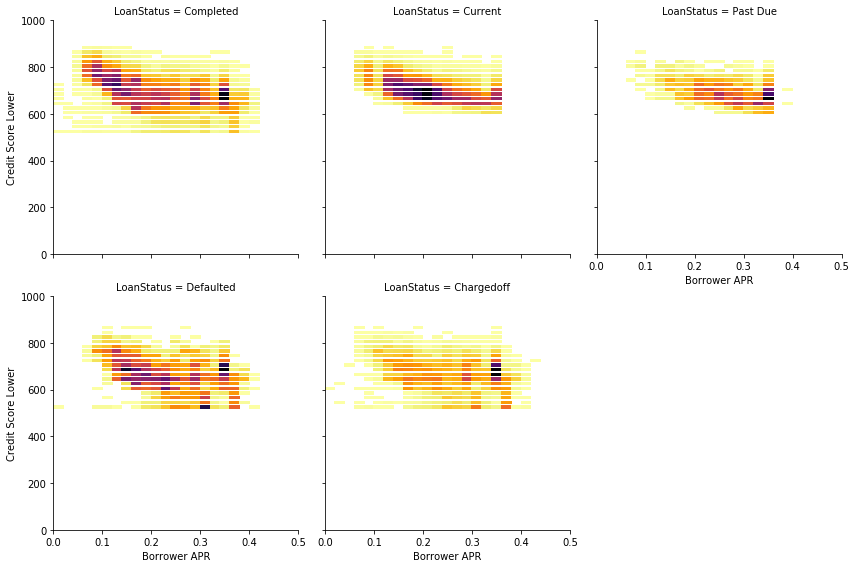

In [76]:
# create faceted heat maps on levels of the Loan Status variable
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR')
g.set_ylabels('Credit Score Lower')

plt.show()

**It can be observed that, for Loan Status "Completed" and "Current" credit score tend to be higher and Borrower APR is lower.**

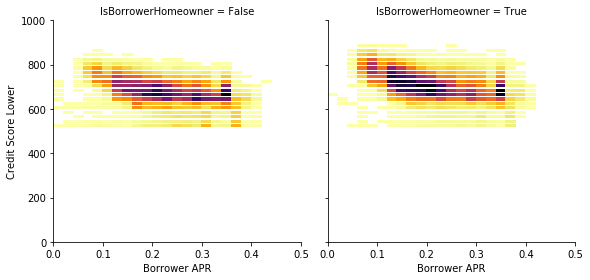

In [77]:
# create faceted heat maps on Borrower Home Ownership
g = sb.FacetGrid(data = loan, col = 'IsBorrowerHomeowner', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR')
g.set_ylabels('Credit Score Lower')

plt.show()

**Home owner borrowers tend to have lower borrower APR's and higher credit scores.**

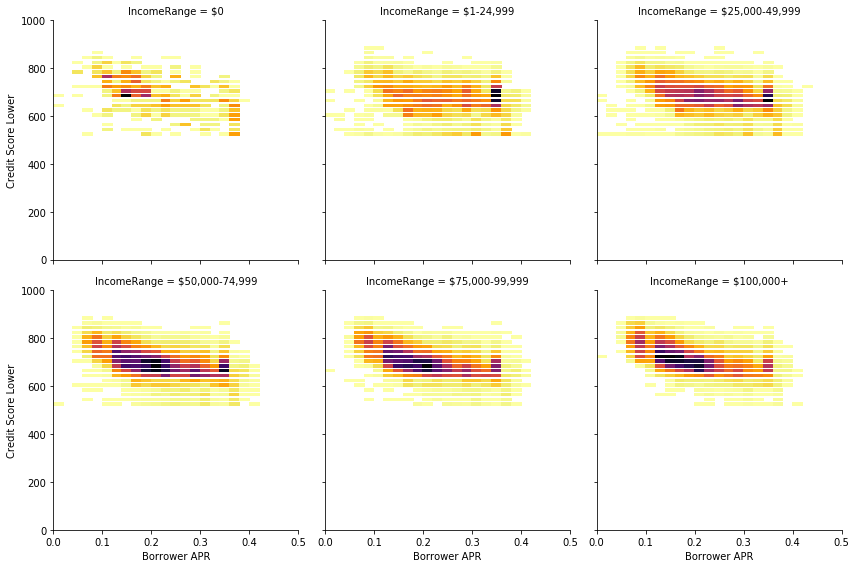

In [78]:
# create faceted heat maps on levels of the income range
g = sb.FacetGrid(data = loan, col = 'IncomeRange', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR')
g.set_ylabels('Credit Score Lower')

plt.show()

**Except income range 0, as income increases borrower APR tend to decrease.**

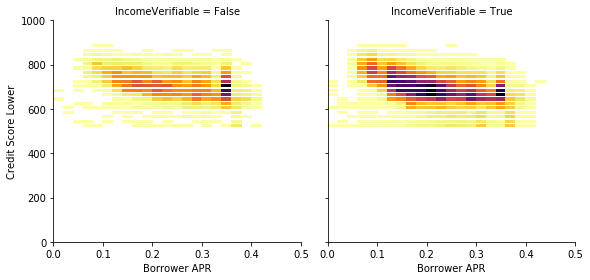

In [79]:
# create faceted heat maps on income verifiableness
g = sb.FacetGrid(data = loan, col = 'IncomeVerifiable', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR')
g.set_ylabels('Credit Score Lower')

plt.show()

**Borrowers with income verifiable tend to have lower borrower APR's.**

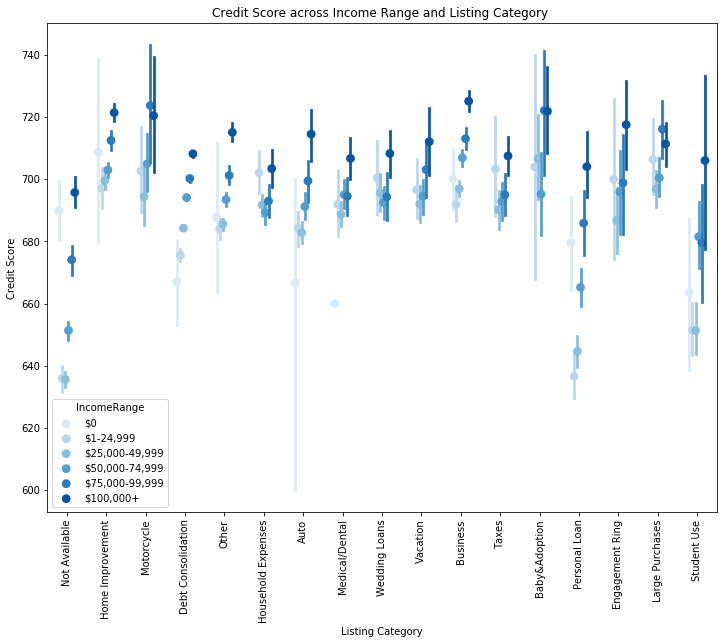

In [80]:
fig = plt.figure(figsize = [12,9])
sb.pointplot(data = loan, x = 'ListingCategory', y = 'CreditScoreRangeLower', hue = 'IncomeRange',palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Credit Score across Income Range and Listing Category ')
plt.xlabel('Listing Category')
plt.ylabel('Credit Score')
plt.xticks(rotation = 90)
plt.show();

**As income range increases, credit score increases for all categories. There are different values however, when income is zero.**

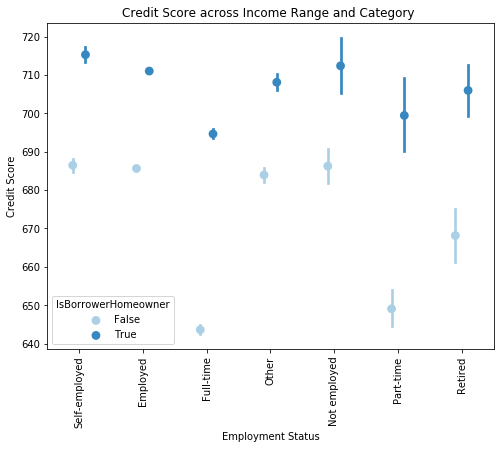

In [81]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'EmploymentStatus', y = 'CreditScoreRangeLower', hue = 'IsBorrowerHomeowner',palette = 'Blues', linestyles = '', dodge = 0.2)
plt.title('Credit Score across Income Range and Category ')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score')
plt.xticks(rotation = 90)
plt.show();

**Home owners have higher credit scores than not owners for all employment statuses.**

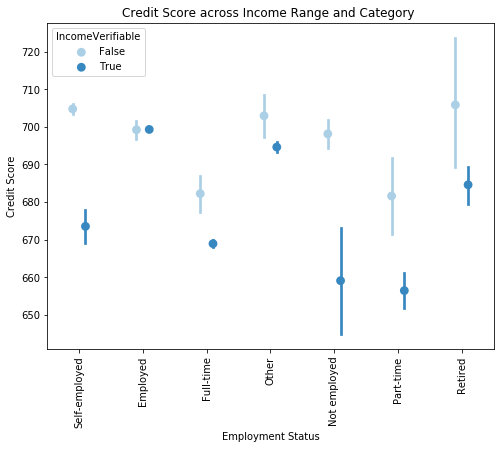

In [82]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'EmploymentStatus', y = 'CreditScoreRangeLower', hue = 'IncomeVerifiable',palette = 'Blues', linestyles = '', dodge = 0.2)
plt.title('Credit Score across Income Range and Category ')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score')
plt.xticks(rotation = 90)
plt.show();

**When income is not verifiable, borrowers have more likely to have higher credit scores.** 

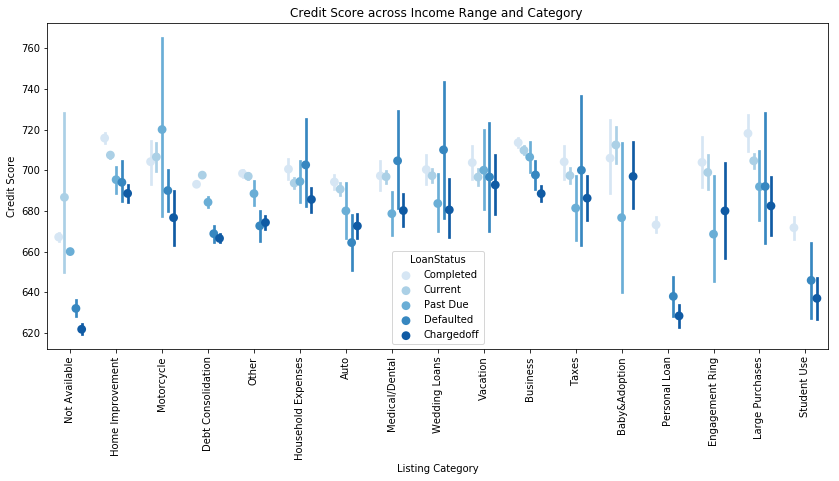

In [83]:
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loan, x = 'ListingCategory', y = 'CreditScoreRangeLower', hue = 'LoanStatus',palette = 'Blues', linestyles = '', dodge = 0.5)
plt.title('Credit Score across Income Range and Category ')
plt.xlabel('Listing Category')
plt.ylabel('Credit Score')
plt.xticks(rotation = 90)
plt.show();

**Loans with loan status defaulted or chargedoff for all categories have likely to have lower credit scores**

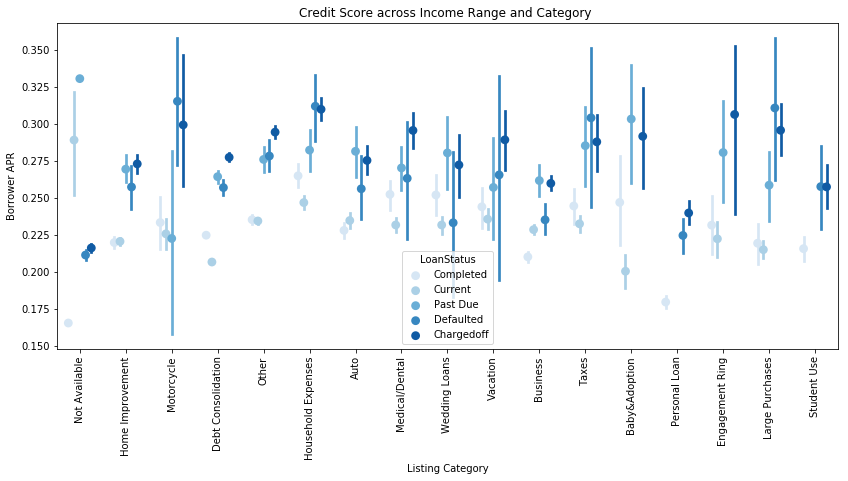

In [84]:
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loan, x = 'ListingCategory', y = 'BorrowerAPR', hue = 'LoanStatus',palette = 'Blues', linestyles = '', dodge = 0.5)
plt.title('Credit Score across Income Range and Category ')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 90)
plt.show();

**Loans with loan status defaulted or chargedoff for all categories have likely to have higher Borrower APR**

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of **Credit Score** against **Borrower APR** by looking at the impact of four categorical quality features such as **Loan Status,** **Borrower's Home Ownerness,** **Income Range,** **Income Verifiableness.**

The multivariate exploration here showed that loans with lower **Borrower APR** and higher **Credit Score** are more likely to be completed. It can also be observed that for all **Employment Status** types, Credit Scores increases as Borrower is **Home Owner** and decreases as Borrower's income is **Not Verifiable.**

Except income range 0, as income increases, **Borrower APR** tend to decrease. **Credit Score** however seems to be not related with **Income Range.**

I than looked at **Credit Score** versus **Listing Category** by looking at impact of **Income Range.** Again when income is 0, the variability of **Credit Scores** increases and these are not matching general trend of increasing **Credit Score** with increasing income.

I also looked at **Credit Score** vs **Employment Status** by looking at **Home Ownerness** and **Income Verifiable.** For all employment status types, the **Credit Score** increases with **Home Ownerness** and decreases with **Income Verifiableness.** Remember, the borrowers with **Income Not Verifiable** has a lot higher proportion of **Business Category** than **Income Verifiable.**

Lastly, I checked **Borrower APR** versus **Listing Category** by looking at impact of **Loan Status.** Loans with loan status "defaulted" or "chargedoff" for all categories have likely to have higher **Borrower APR.**

### Were there any interesting or surprising interactions between features?

Looking at Credit Score vs two categorical variables: Income Range and Listing Category, I observed that sometimes when income is 0, the credit score is higher than higher income ranges.